In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2
import Methods as m

## Load the training data into feature matrix, class labels, and event ids:

In [2]:
from proj1_helpers import *
DATA_TRAIN_PATH = '/Users/gerald/Workspaces/Machine Leaning/ML-Project-1-EPFL/train.csv' # TODO: download train data and supply path here 
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)

In [267]:
def standardize(x):
    ''' fill your code in here...
    '''
    centered_data = x - np.mean(x, axis=0)
    std_data = centered_data / np.std(centered_data, axis=0)
    
    return std_data

In [619]:
tX[:,22]
tX0=[]
tX1=[]
tX2=[]
tX3=[]


In [620]:
for index, jet_num in enumerate(tX[:,22]):
    
    if(int(jet_num)==0):
        tX0.append(np.insert(tX[index],0,index))
    if(int(jet_num)==1):
        tX1.append(np.insert(tX[index],0,index))
    if(int(jet_num)==2):
        tX2.append(np.insert(tX[index],0,index))
    if(int(jet_num)==3):
        tX3.append(np.insert(tX[index],0,index))
tX0=np.array(tX0)
tX1=np.array(tX1)
tX2=np.array(tX2)
tX3=np.array(tX3)

In [621]:
def nan_to_median(tX):
    median_per_col=np.nanmedian(tX,axis=0)
    for i in range(tX.shape[0]):
        for j in range(len(median_per_col)):
            if(np.isnan(tX[i,j])):
                tX[i,j]=median_per_col[j]
    return tX

### Analyse tx0

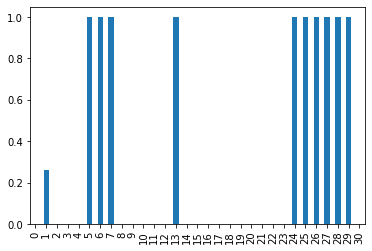

In [622]:
import pandas as pd

df=pd.DataFrame(tX0)

missing_series=df.isnull().sum()/df.shape[0]
missing_series.plot(kind="bar")

In [623]:
tX0_dropped=np.delete(tX0,[5,6,7,13,24,25,26,27,28,29],axis=1)
tX0_dropped

array([[3.00000e+00, 1.43905e+02, 8.14170e+01, ..., 8.60620e+01,
        0.00000e+00, 0.00000e+00],
       [4.00000e+00, 1.75864e+02, 1.69150e+01, ..., 5.31310e+01,
        0.00000e+00, 0.00000e+00],
       [8.00000e+00, 1.05594e+02, 5.05590e+01, ..., 1.29804e+02,
        0.00000e+00, 0.00000e+00],
       ...,
       [2.49996e+05,         nan, 5.81790e+01, ..., 8.04080e+01,
        0.00000e+00, 0.00000e+00],
       [2.49998e+05, 9.49510e+01, 1.93620e+01, ..., 1.12718e+02,
        0.00000e+00, 0.00000e+00],
       [2.49999e+05,         nan, 7.27560e+01, ..., 9.94050e+01,
        0.00000e+00, 0.00000e+00]])

In [624]:
tX0_dropped[:,1:2]=nan_to_median(tX0_dropped[:,1:2])

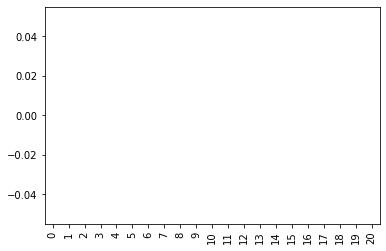

In [625]:
df=pd.DataFrame(tX0_dropped)

missing_series=df.isnull().sum()/df.shape[0]
missing_series.plot(kind="bar")

In [626]:
import seaborn as sns

//anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
//anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


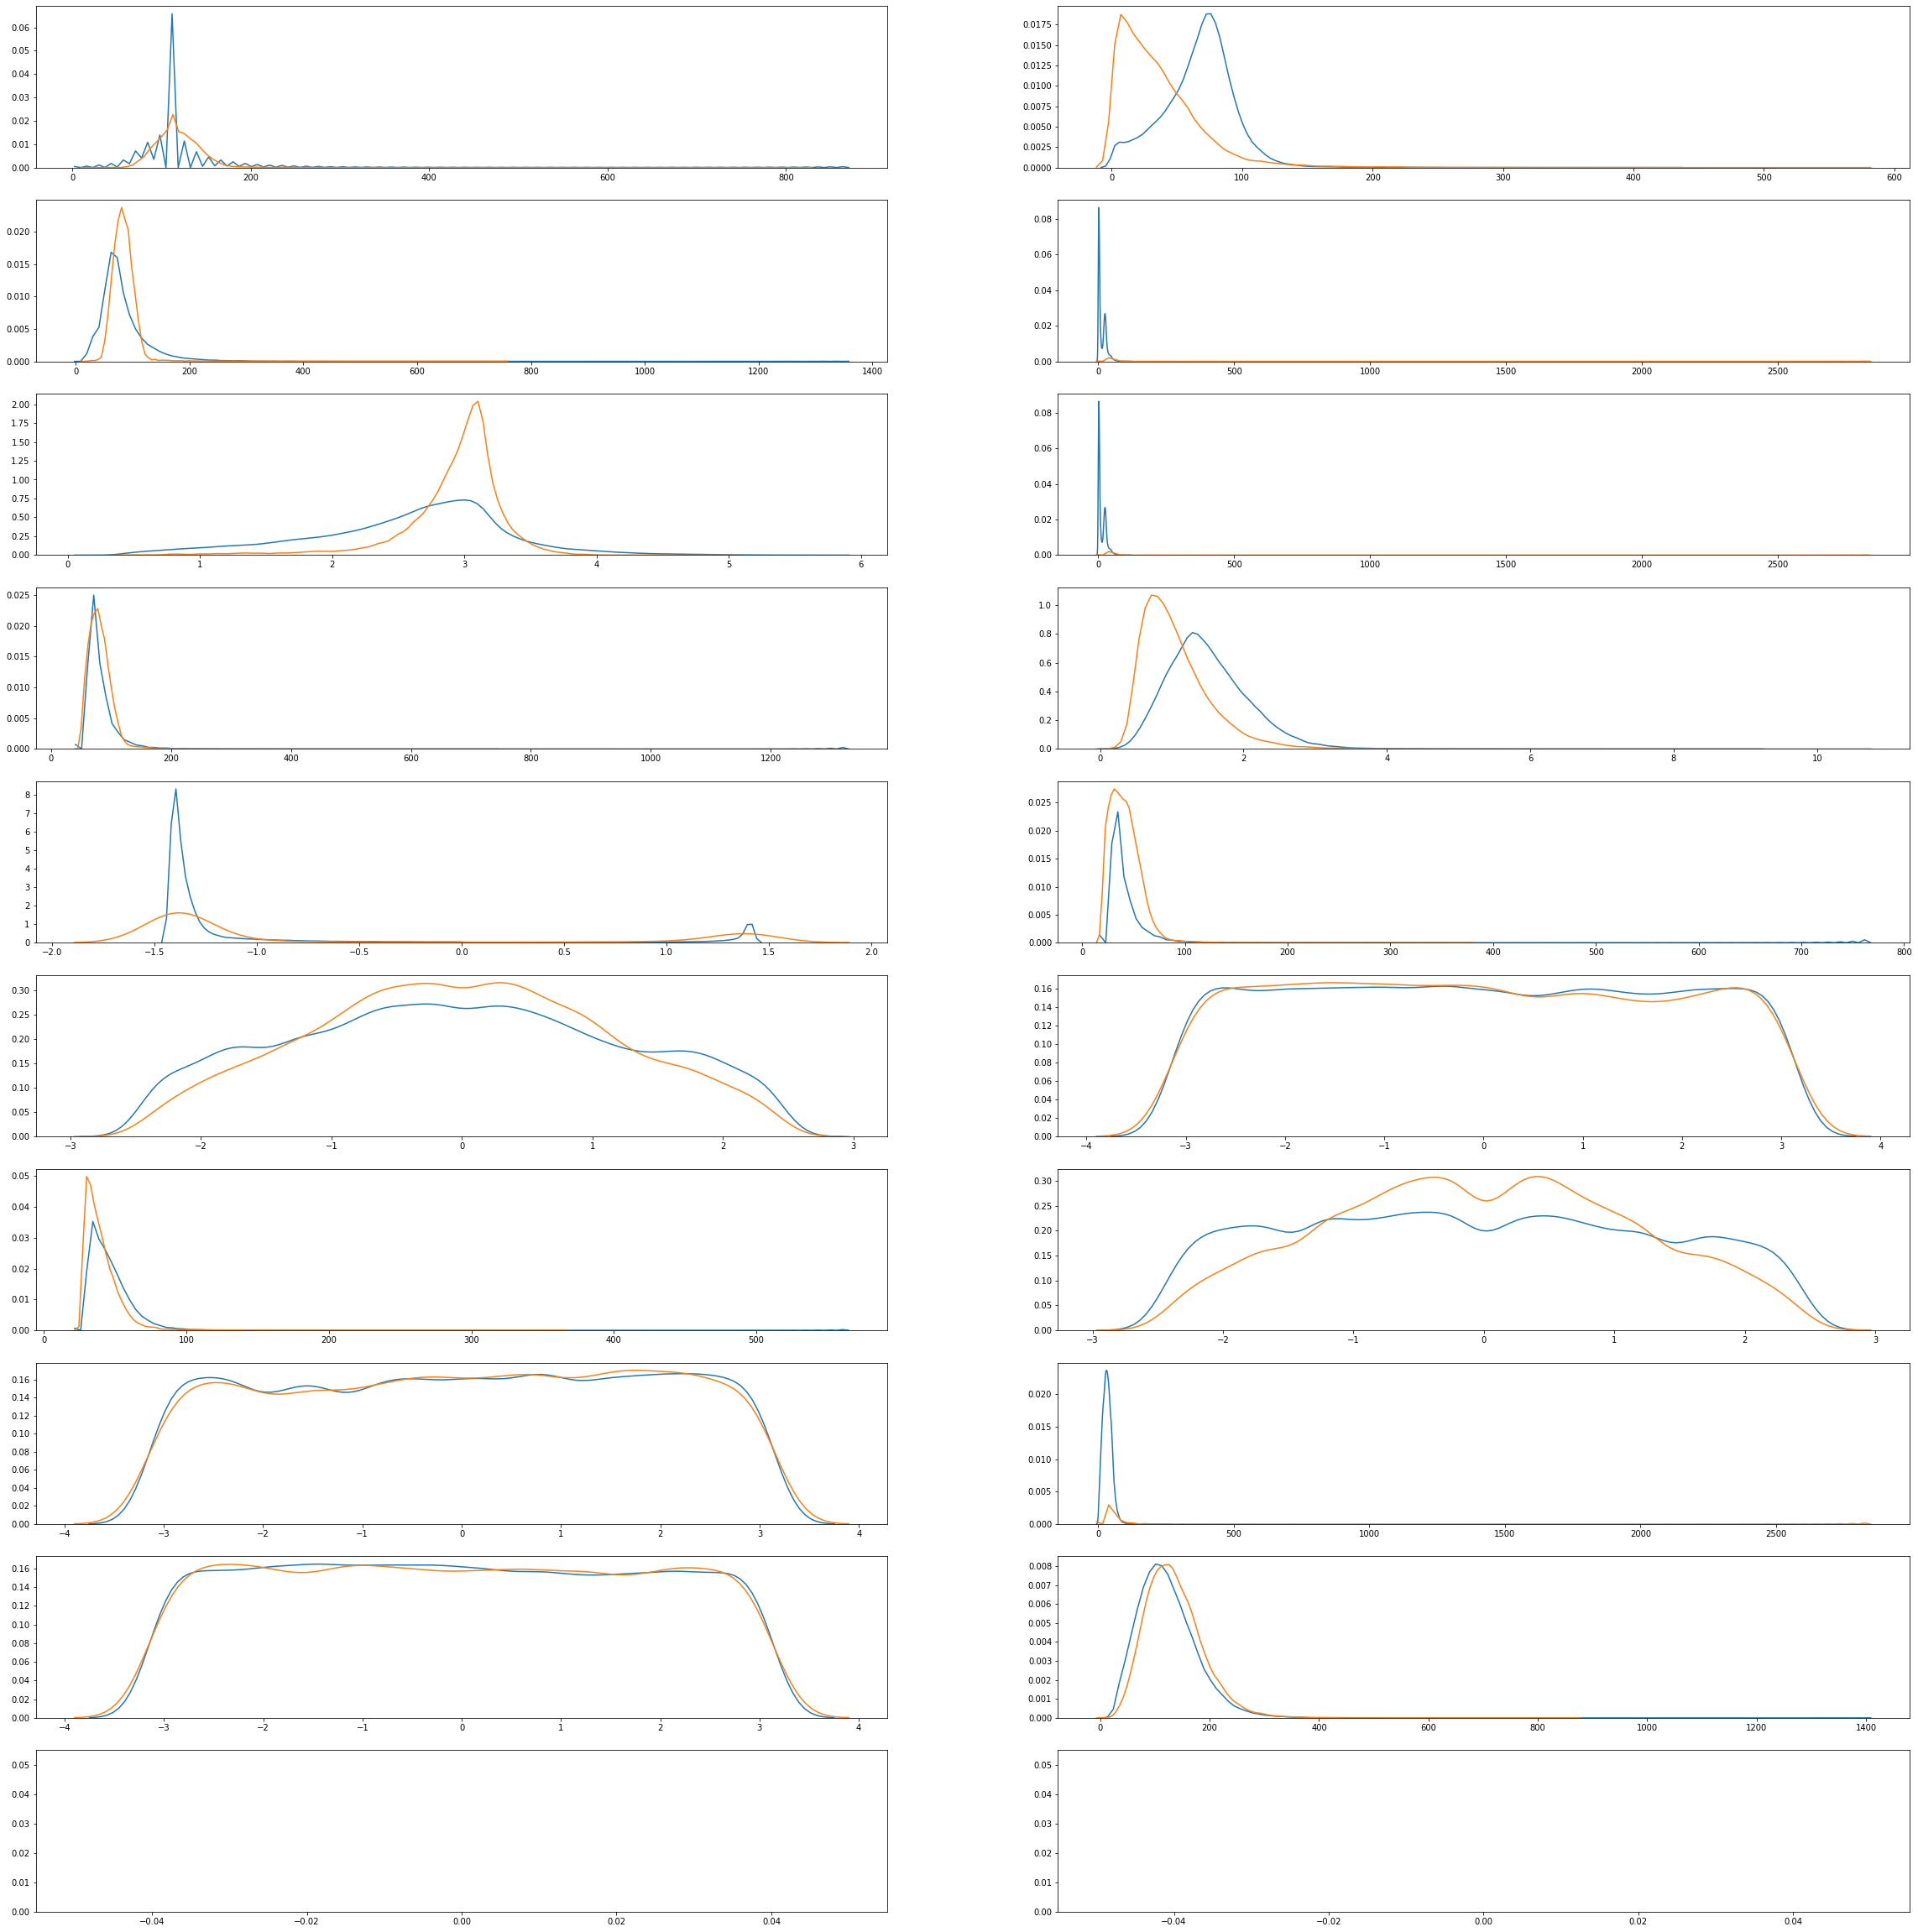

In [627]:
# from matplotlib import pyplot as plt


labels_dropped0=y[tX0_dropped[:,0].astype(int)]
tX0_label0=tX0_dropped[labels_dropped0==-1]
tX0_label1=tX0_dropped[labels_dropped0==1]
fig=plt.figure(figsize=(40,80))
for i in range(1,tX0_label0.shape[1]):
    plt.subplot(19,2,i)
    sns.distplot( tX0_label0[:,i],ax=plt.gca(),hist=False)
    sns.distplot( tX0_label1[:,i],ax=plt.gca(),hist=False)


In [628]:
tX0_dropped_distribution=np.delete(tX0_dropped,[4,12,19,20],axis=1)


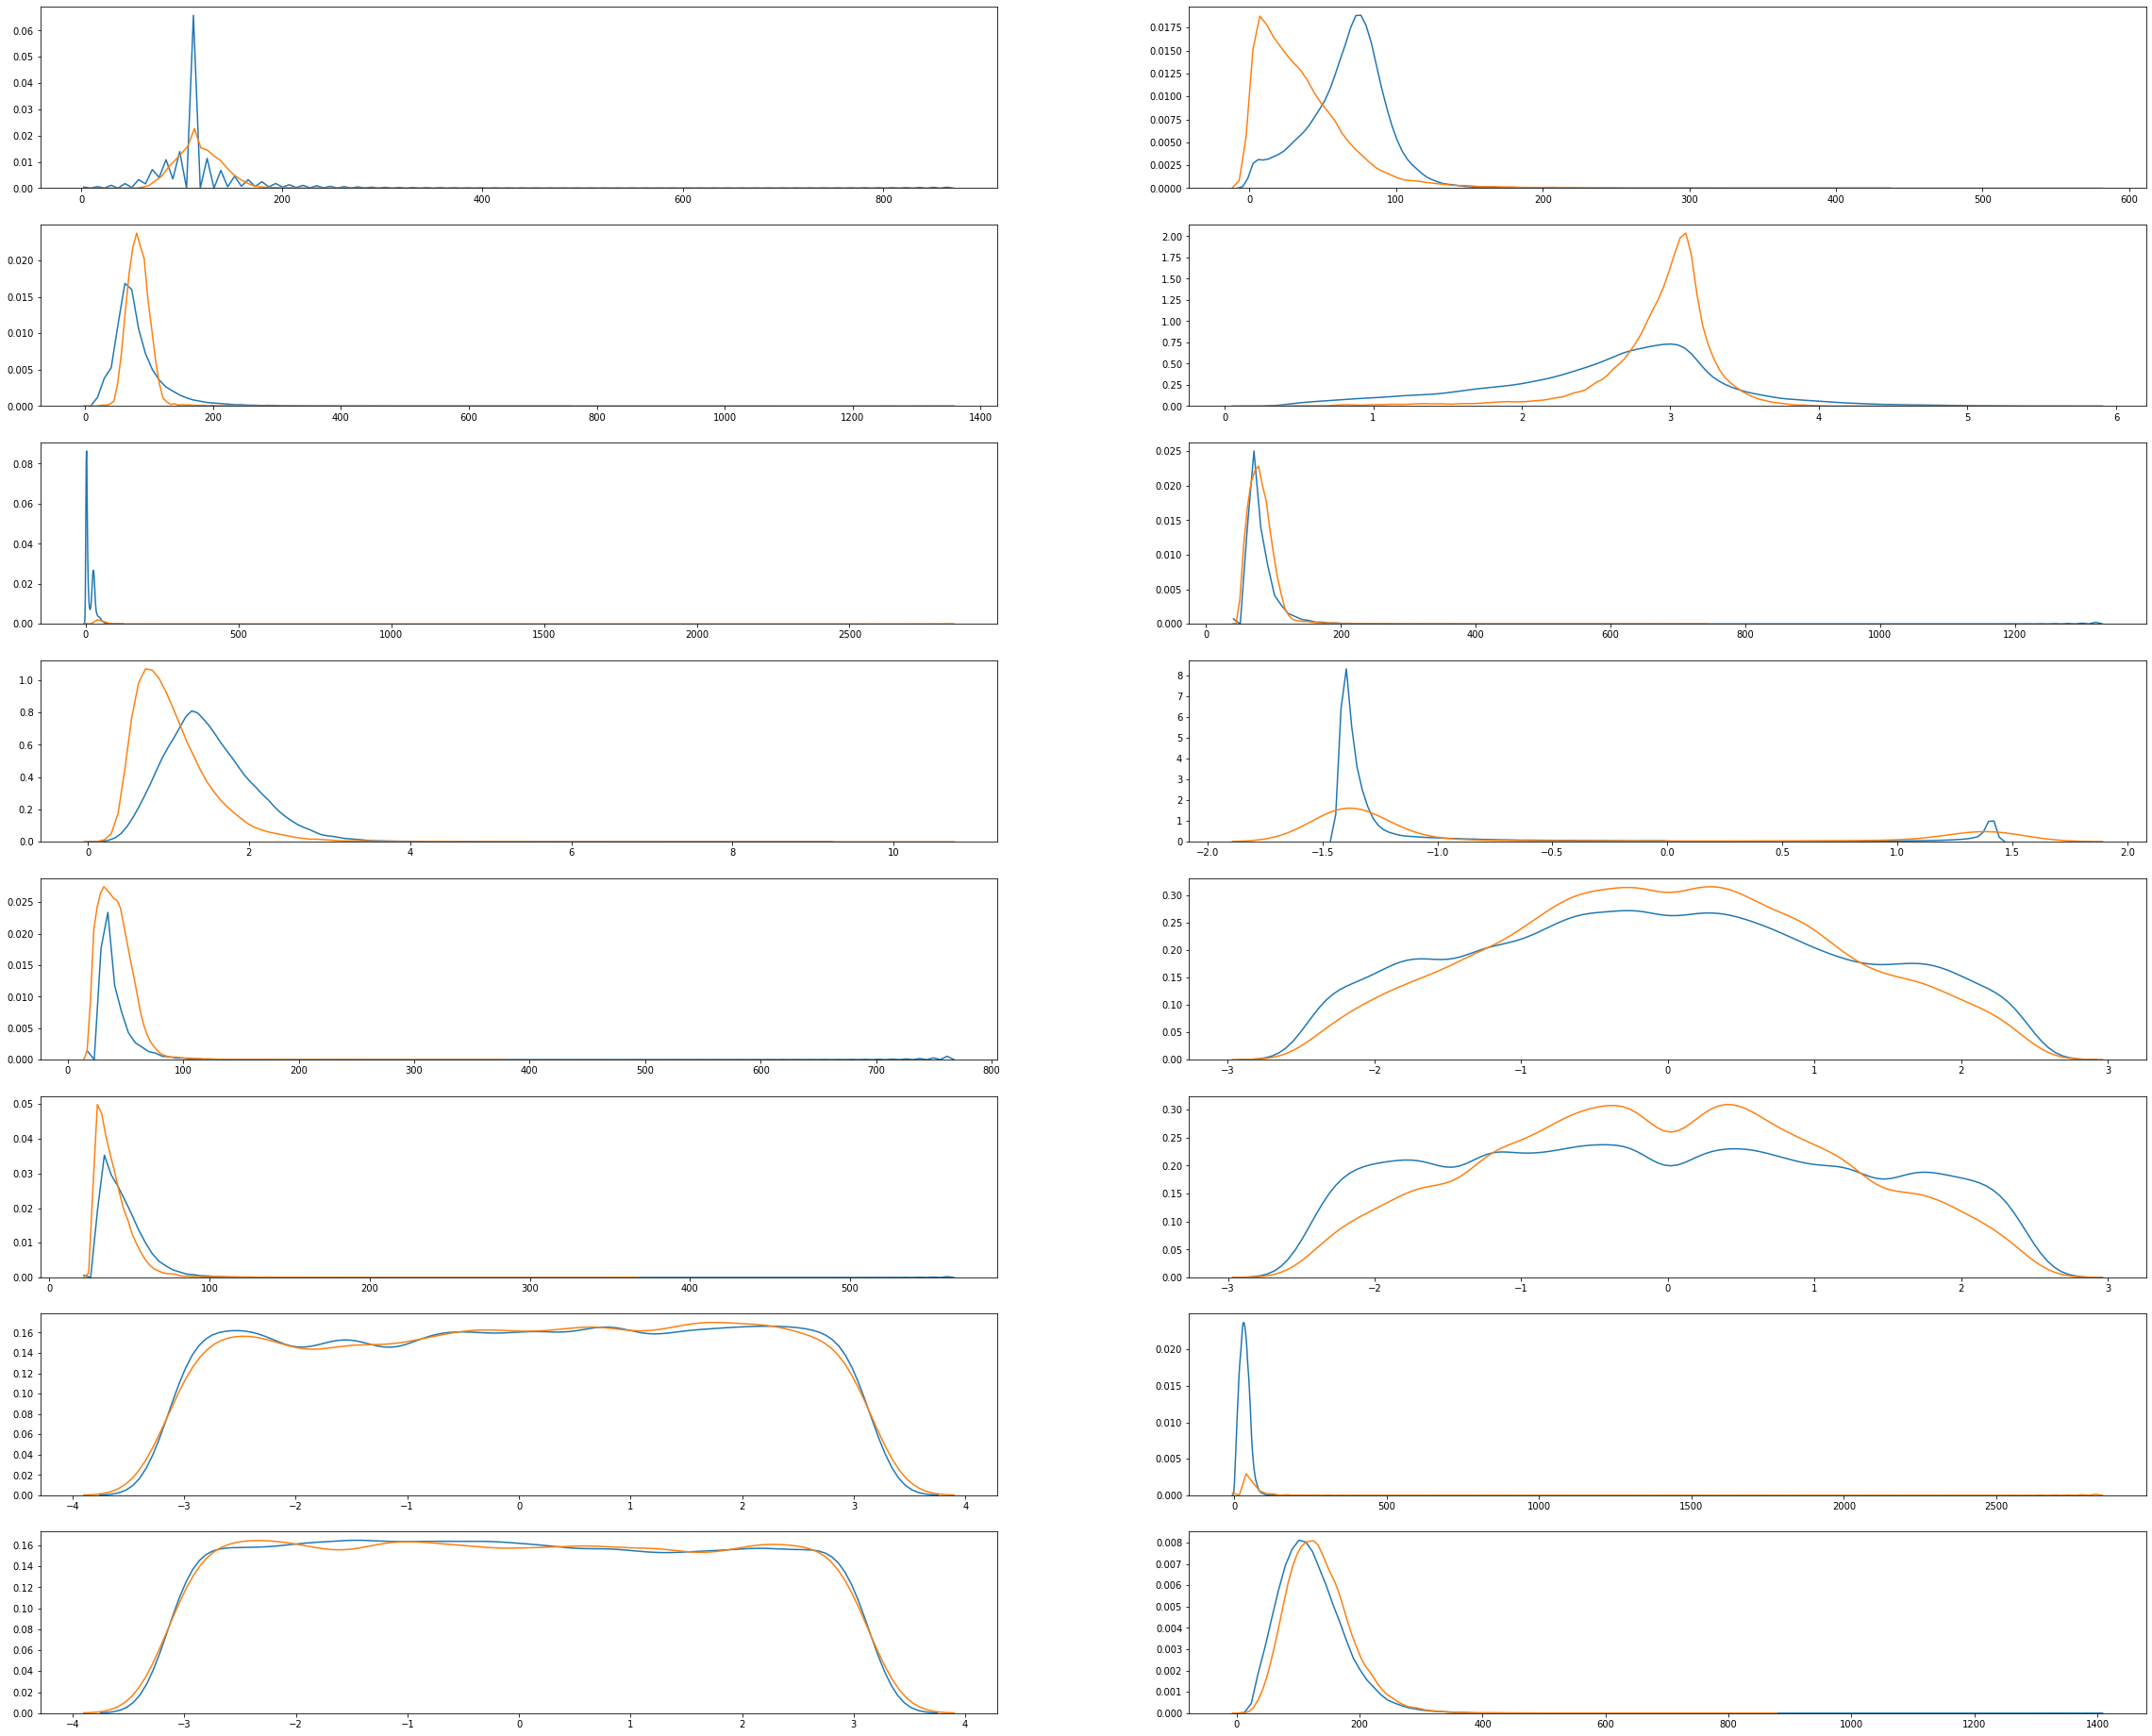

In [631]:
labels_dropped0=y[tX0_dropped_distribution[:,0].astype(int)]
tX0_label0=tX0_dropped_distribution[labels_dropped0==-1]
tX0_label1=tX0_dropped_distribution[labels_dropped0==1]
# sns.distplot( tX0_label0[:,3],ax=plt.gca(),hist=False)
fig1=plt.figure(figsize=(40,80))
for i in range(1,tX0_label0.shape[1]):
    plt.subplot(19,2,i)
    sns.distplot( tX0_label0[:,i],ax=plt.gca(),hist=False)
    sns.distplot( tX0_label1[:,i],ax=plt.gca(),hist=False)

In [634]:

index_to_be_skewed=[2,4,6,7,11]

tX0_skew_mins=np.apply_along_axis(np.min,0,tX0_dropped_distribution)
tX0_dropped_distribution[:,index_to_be_skewed]=tX0_dropped_distribution[:,index_to_be_skewed]+np.abs(tX0_skew_mins[index_to_be_skewed])
tX0_dropped_distribution[:,index_to_be_skewed]= np.log(tX0_dropped_distribution[:,index_to_be_skewed]+1)

tX0_dropped_distribution[:,1:]=standardize(tX0_dropped_distribution[:,1:])
tX0_dropped_distribution


array([[ 3.00000000e+00,  5.74308492e-01,  6.61674337e-01, ...,
        -2.24081365e-02,  4.66281477e-02, -7.49699713e-01],
       [ 4.00000000e+00,  1.28996467e+00, -1.15182632e+00, ...,
        -1.41978600e+00, -4.67453199e-01, -1.37002885e+00],
       [ 8.00000000e+00, -2.83587688e-01,  1.04278234e-01, ...,
         3.08175033e-01,  2.67495994e-02,  7.42788213e-02],
       ...,
       [ 2.49996000e+05, -1.52409806e-01,  2.68074433e-01, ...,
         7.48985443e-01, -4.65244472e-01, -8.56205465e-01],
       [ 2.49998000e+05, -5.21915819e-01, -9.99695348e-01, ...,
        -9.55274521e-01,  4.61316753e-01, -2.47574254e-01],
       [ 2.49999000e+05, -1.52409806e-01,  5.29735952e-01, ...,
         4.52943755e-01, -8.67785075e-01, -4.98354425e-01]])

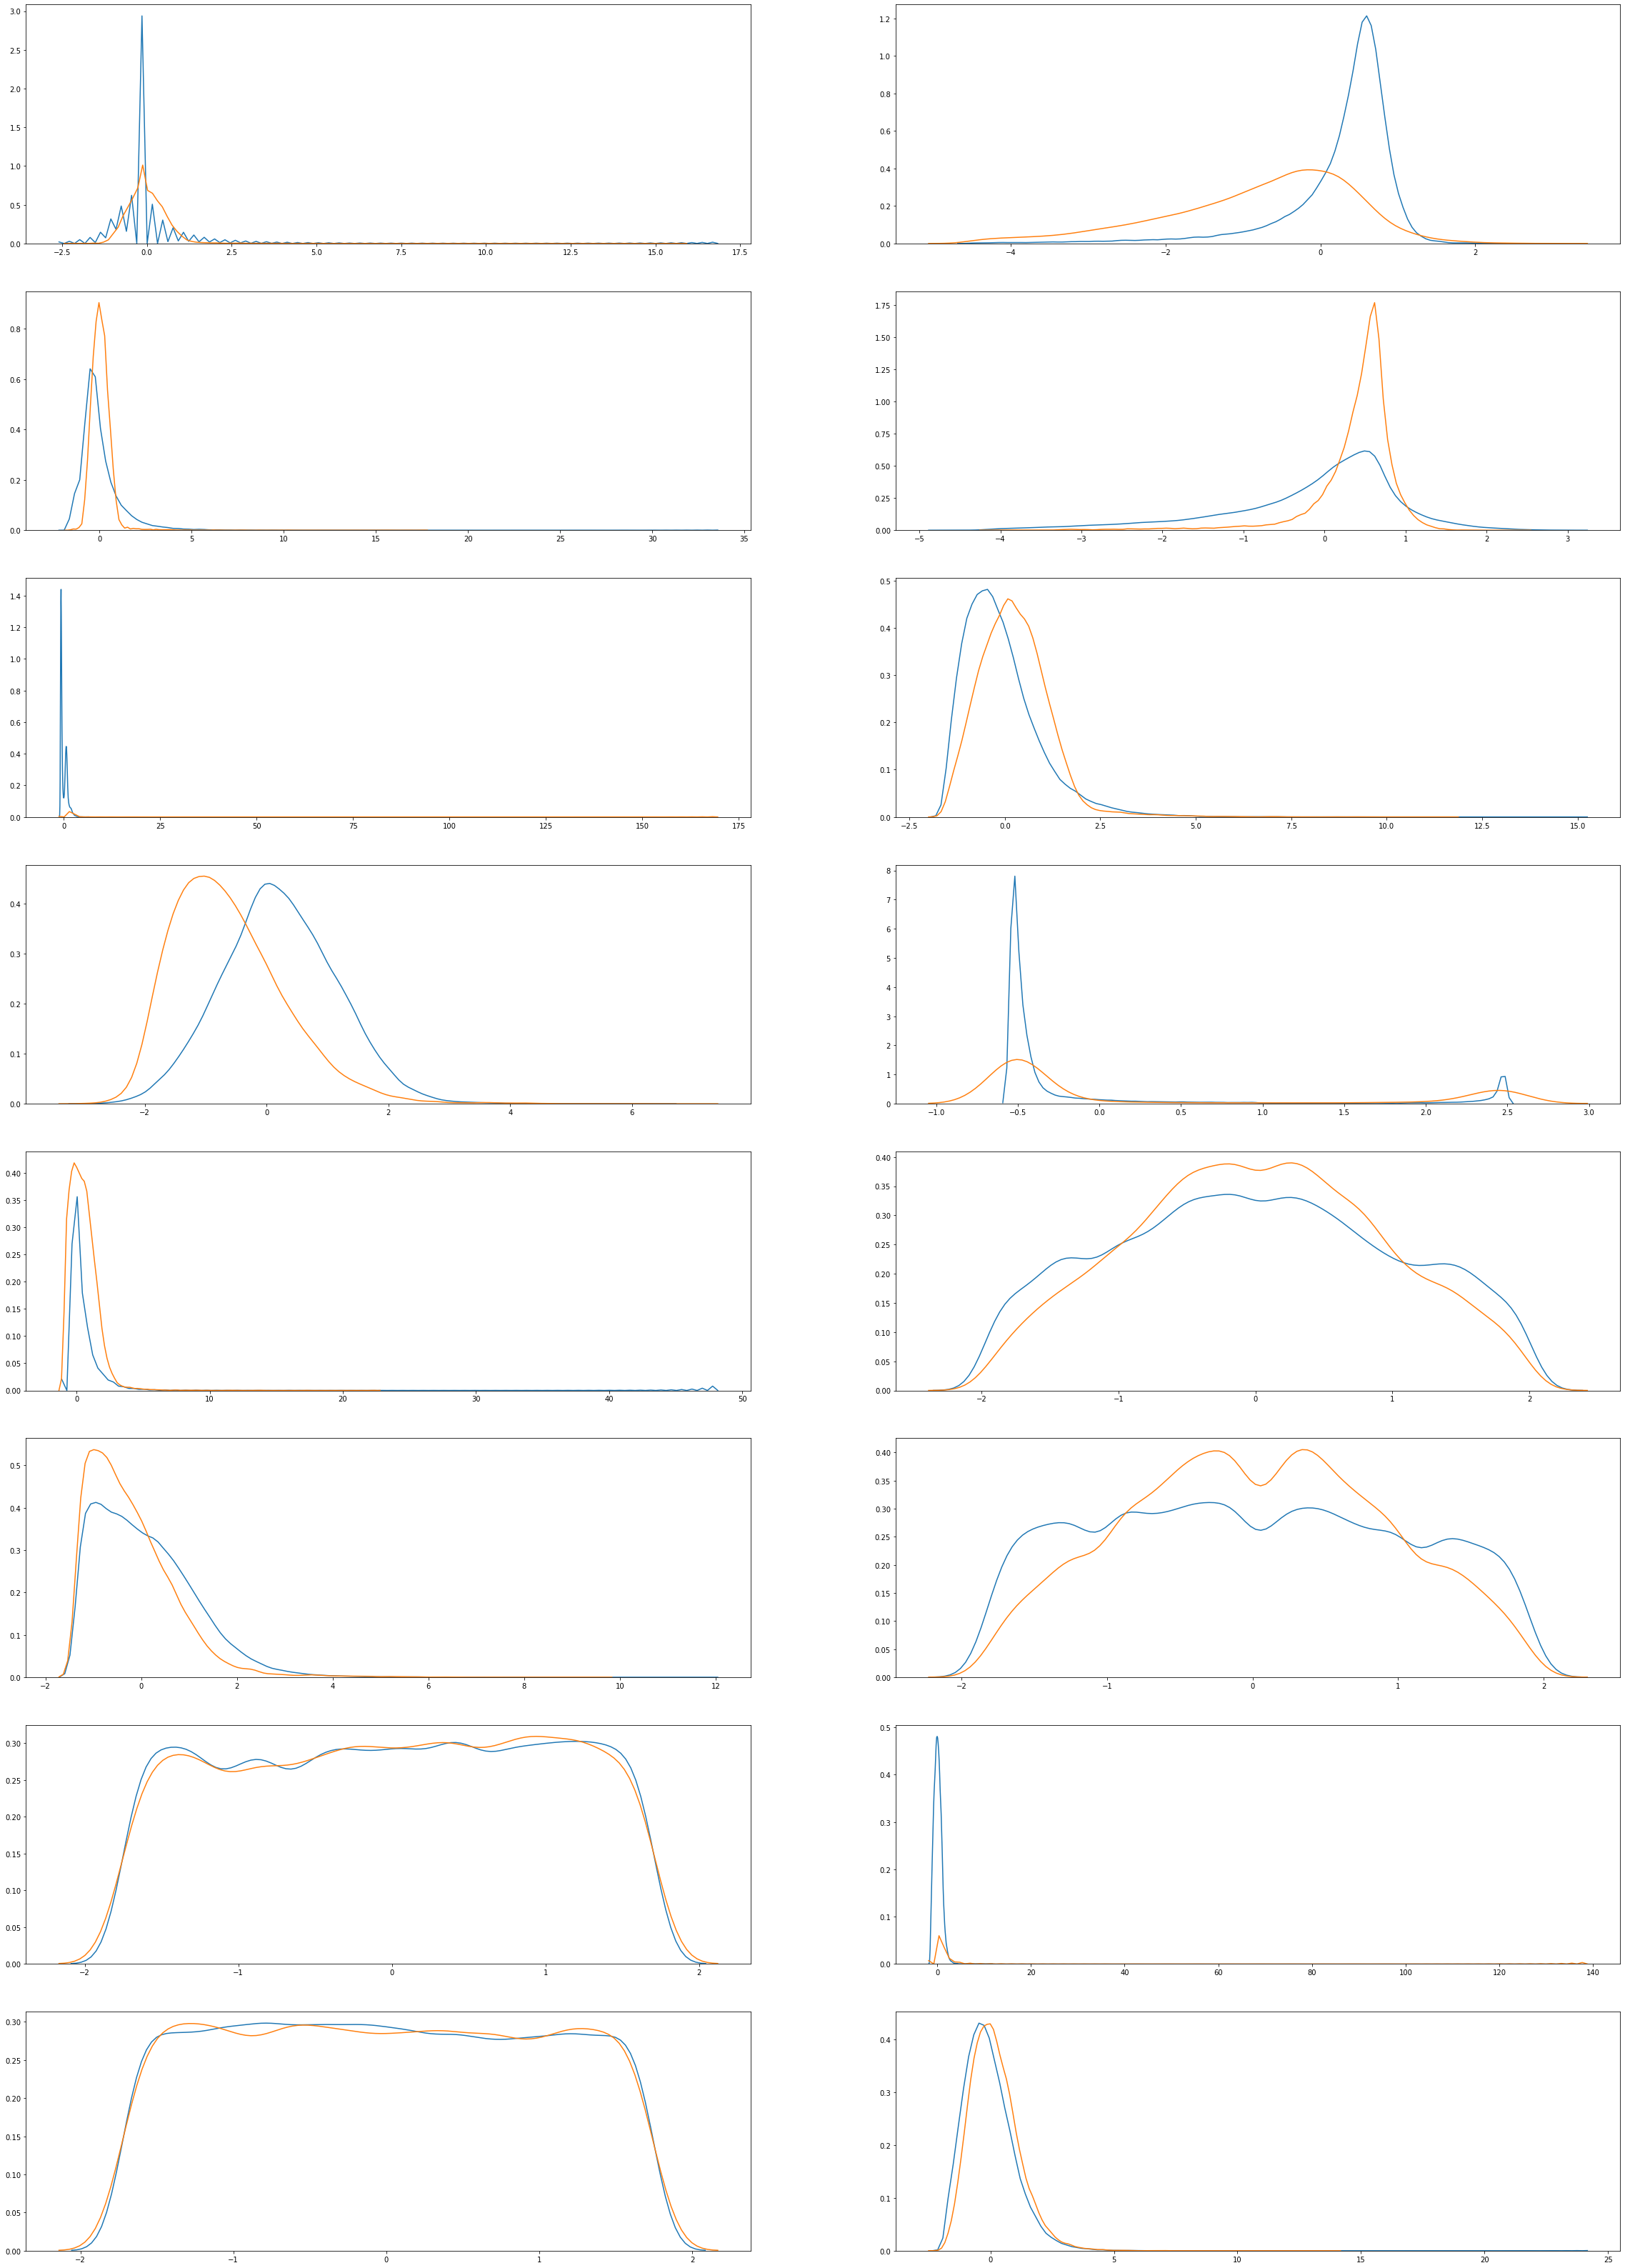

In [635]:
labels_dropped0=y[tX0_dropped_distribution[:,0].astype(int)]
tX0_label0=tX0_dropped_distribution[labels_dropped0==-1]
tX0_label1=tX0_dropped_distribution[labels_dropped0==1]
# sns.distplot( tX0_label0[:,3],ax=plt.gca(),hist=False)
fig1=plt.figure(figsize=(40,80))
for i in range(1,tX0_label0.shape[1]):
    plt.subplot(11,2,i)
    sns.distplot( tX0_label0[:,i],ax=plt.gca(),hist=False)
    sns.distplot( tX0_label1[:,i],ax=plt.gca(),hist=False)

### Analyse tx1

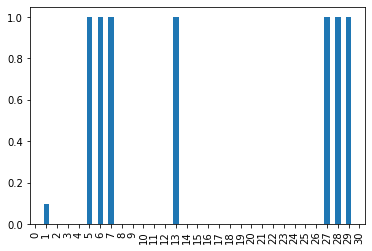

In [636]:
import pandas as pd

df=pd.DataFrame(tX1)

missing_series=df.isnull().sum()/df.shape[0]
missing_series.plot(kind="bar")

In [637]:
tX1_dropped=np.delete(tX1,[5,6,7,13,27,28,29],axis=1)

In [638]:
tX1_dropped[:,1:2]=nan_to_median(tX1_dropped[:,1:2])

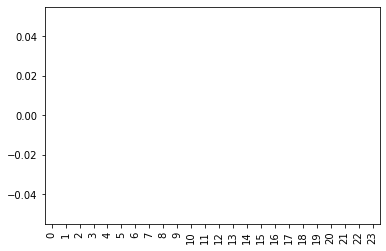

In [639]:
df=pd.DataFrame(tX1_dropped)

missing_series=df.isnull().sum()/df.shape[0]
missing_series.plot(kind="bar")

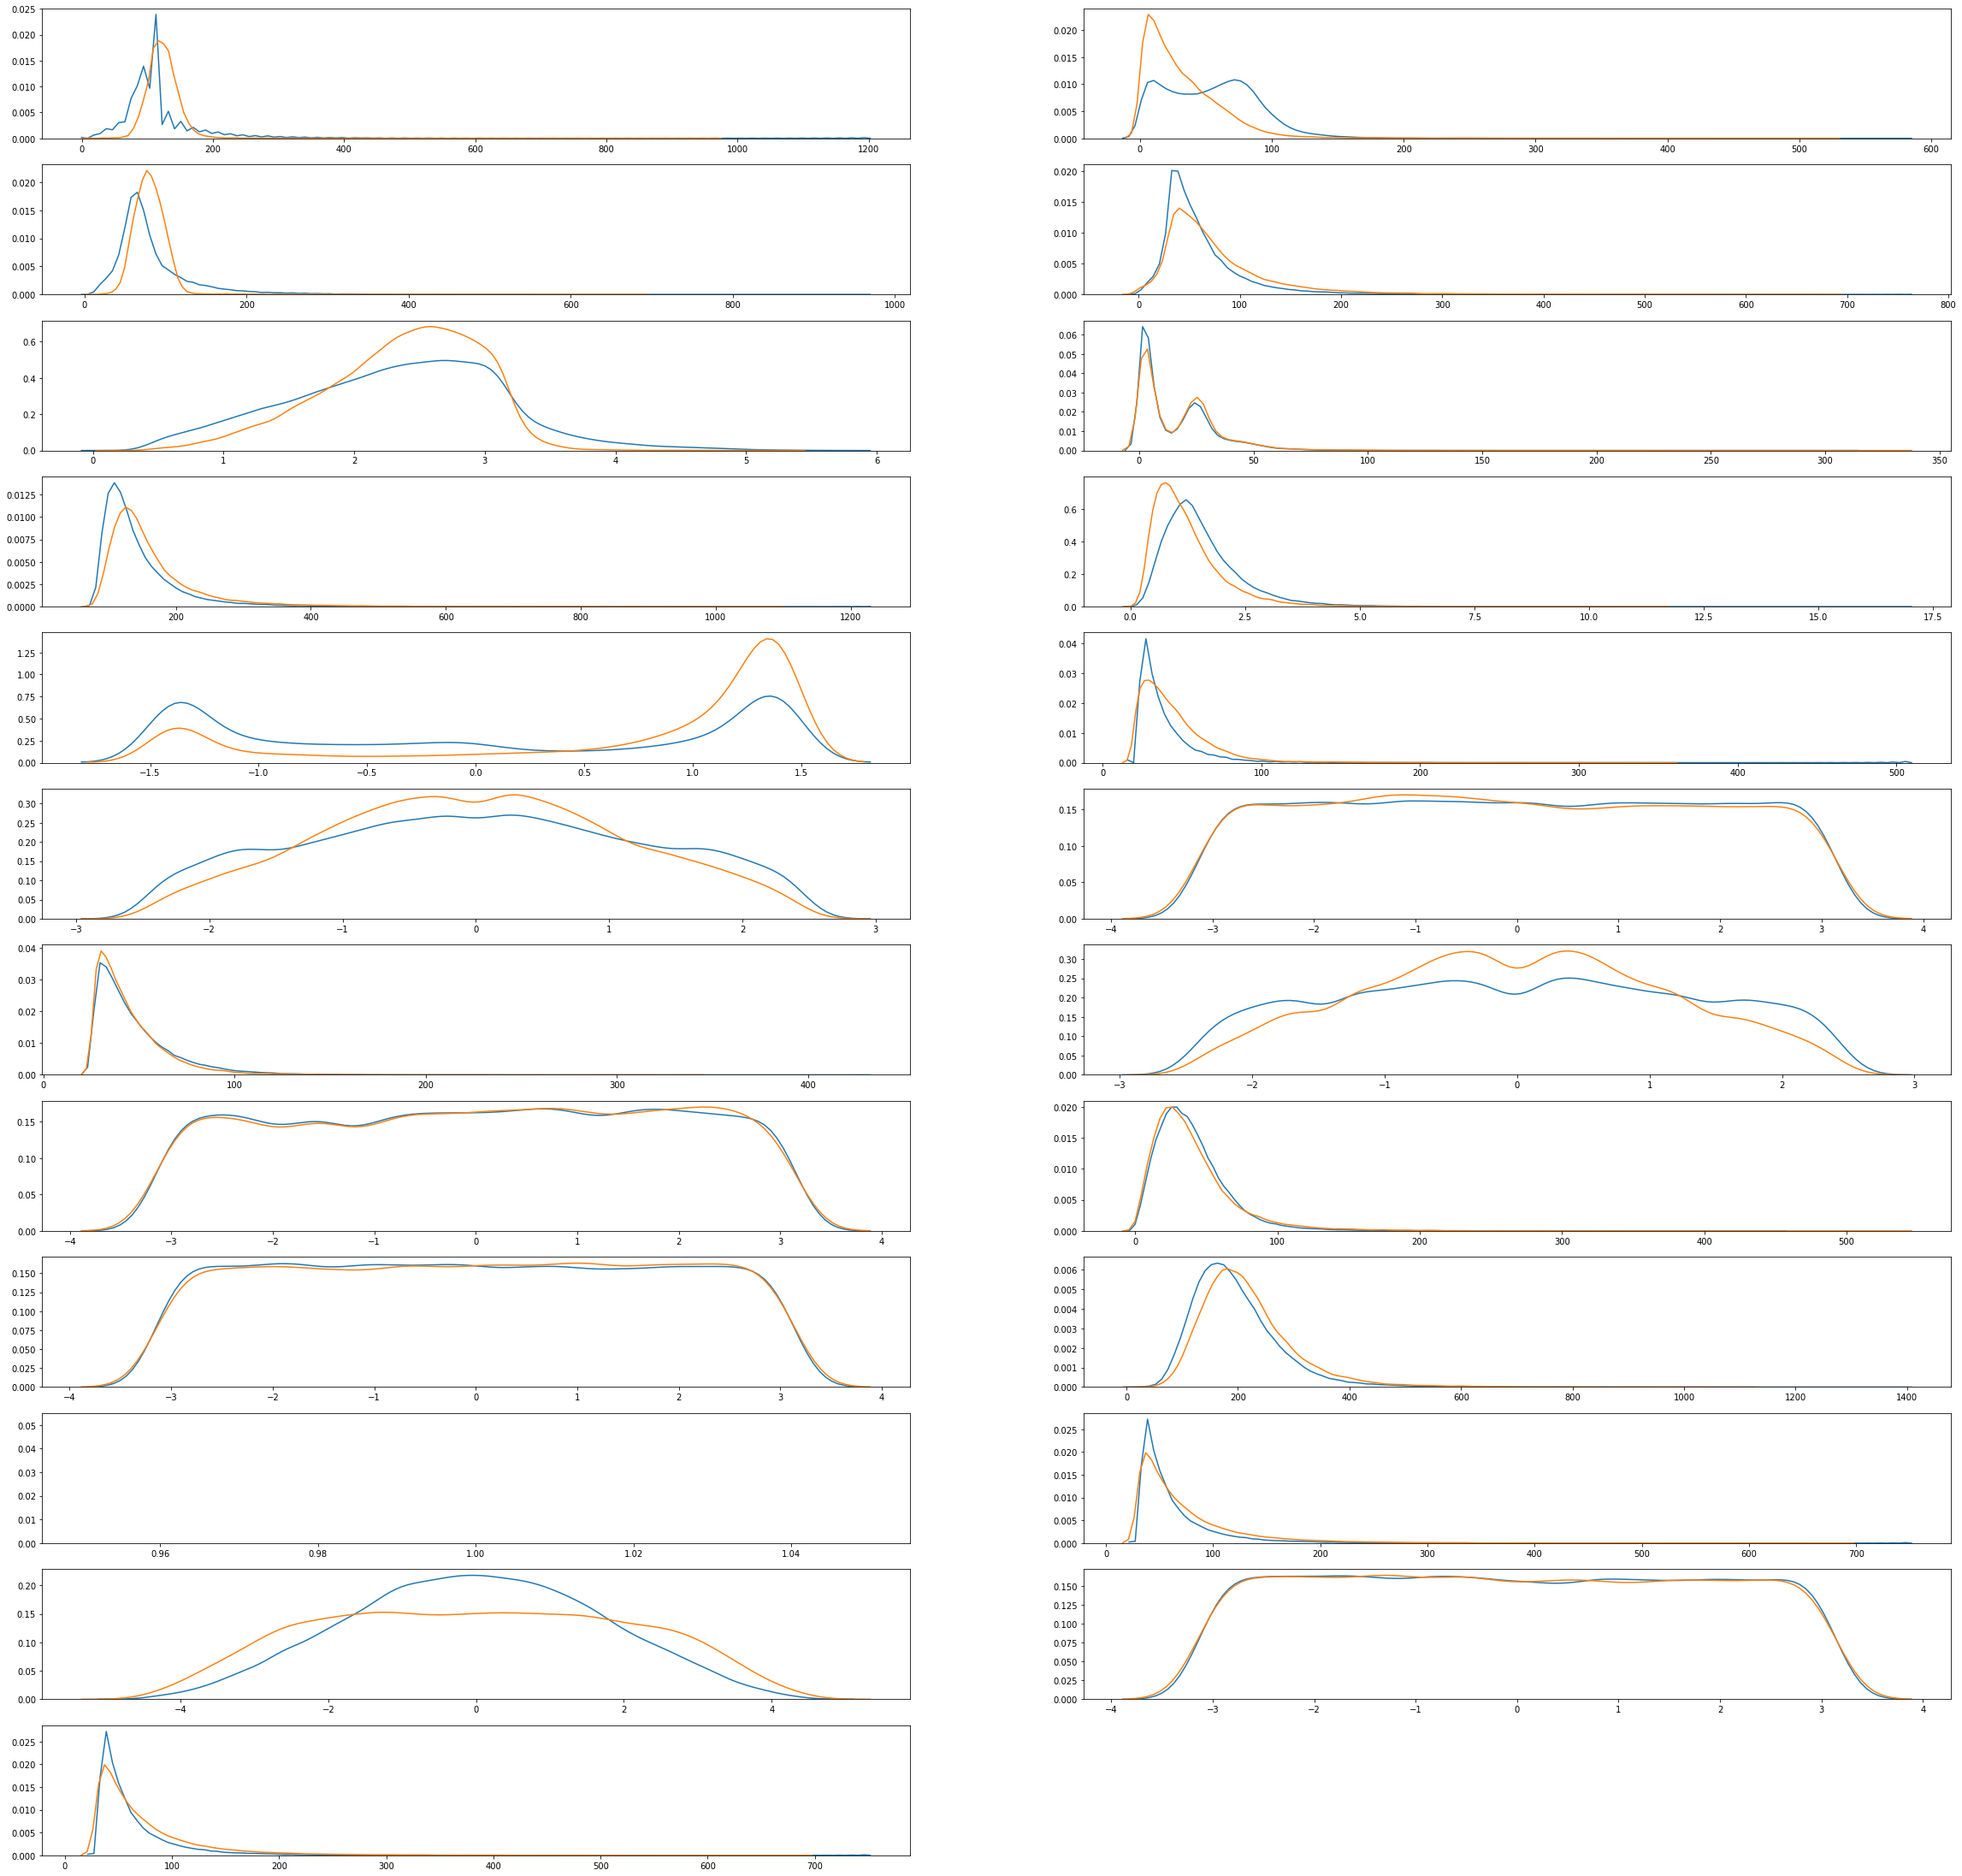

In [641]:
labels_dropped1=y[tX1_dropped[:,0].astype(int)]
tX1_label0=tX1_dropped[labels_dropped1==-1]
tX1_label1=tX1_dropped[labels_dropped1==1]
fig=plt.figure(figsize=(40,80))
for i in range(1,tX1_label0.shape[1]):
    plt.subplot(24,2,i)
    sns.distplot( tX1_label0[:,i],ax=plt.gca(),hist=False)
    sns.distplot( tX1_label1[:,i],ax=plt.gca(),hist=False)

In [642]:
tX1_dropped_distribution=np.delete(tX1_dropped,[12,15,17,19,20],axis=1)


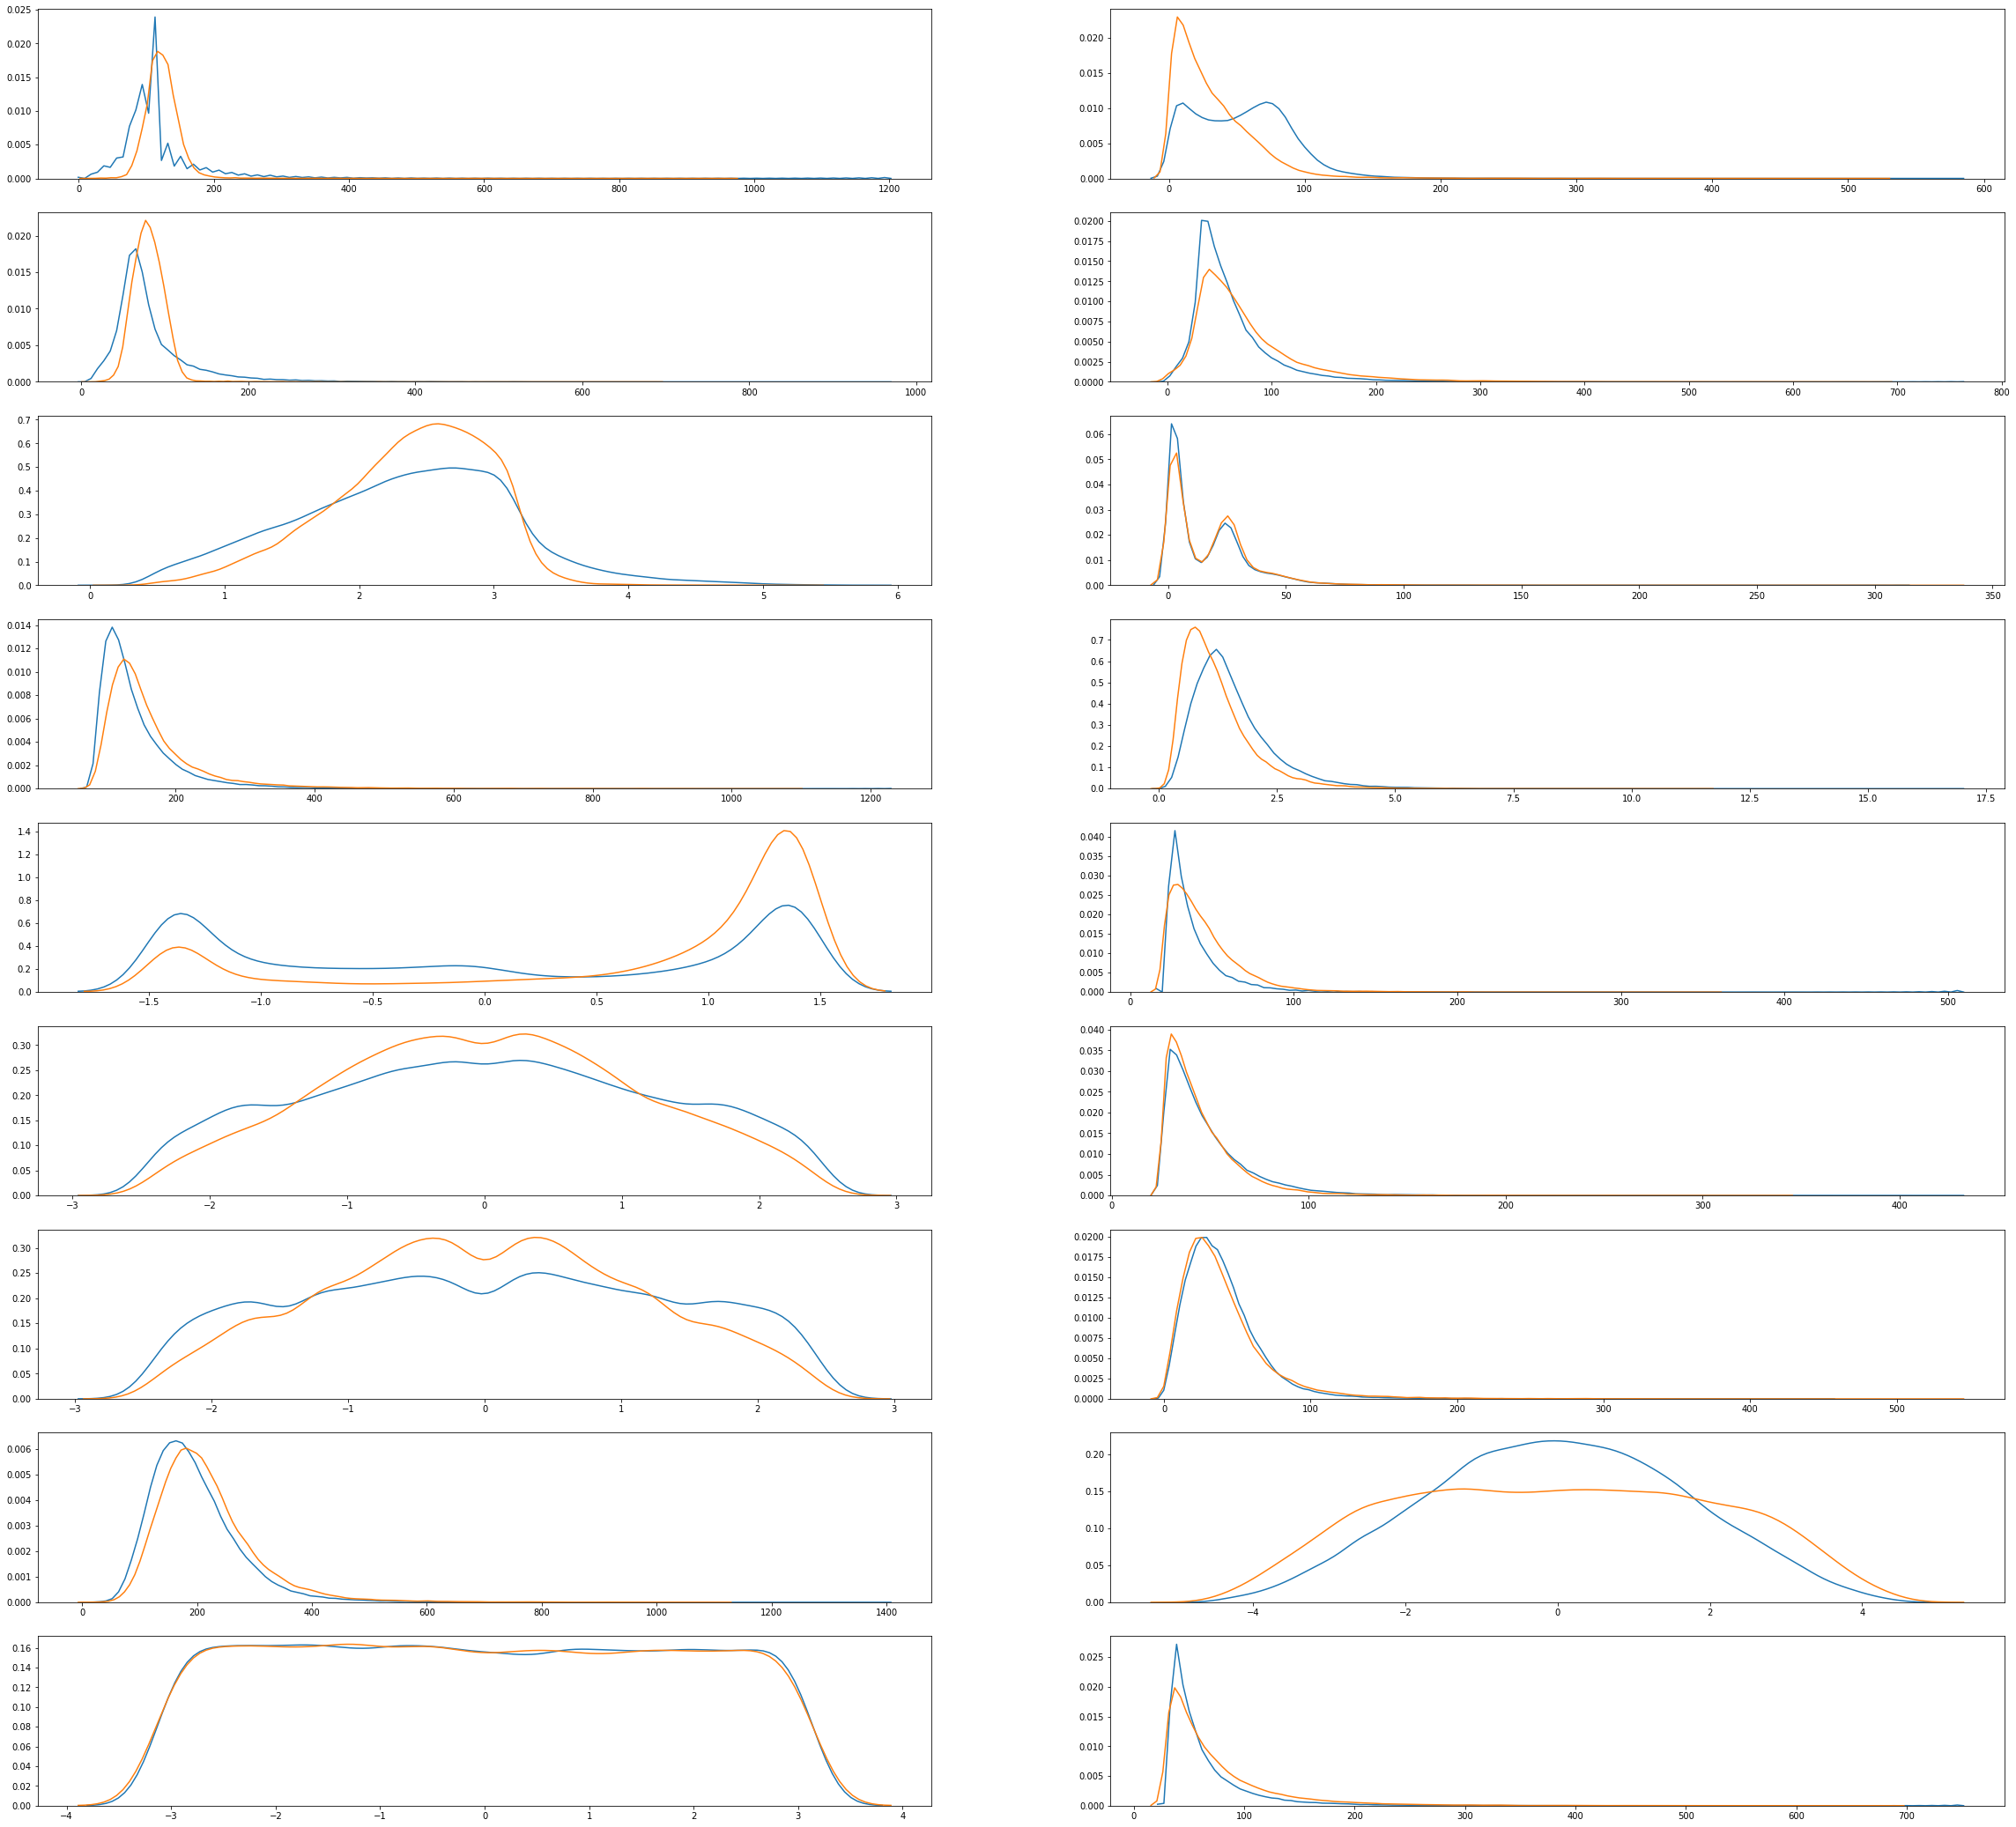

In [643]:
labels_dropped1=y[tX1_dropped_distribution[:,0].astype(int)]
tX1_label0=tX1_dropped_distribution[labels_dropped1==-1]
tX1_label1=tX1_dropped_distribution[labels_dropped1==1]
fig=plt.figure(figsize=(40,80))
for i in range(1,tX1_label0.shape[1]):
    plt.subplot(19,2,i)
    sns.distplot(tX1_label0[:,i],ax=plt.gca(),hist=False)
    sns.distplot(tX1_label1[:,i],ax=plt.gca(),hist=False)

In [644]:
index_to_be_skewed=[10,12,18]

tX1_skew_mins=np.apply_along_axis(np.min,0,tX1_dropped_distribution)
tX1_dropped_distribution[:,index_to_be_skewed]=tX1_dropped_distribution[:,index_to_be_skewed]+np.abs(tX1_skew_mins[index_to_be_skewed])
tX1_dropped_distribution[:,index_to_be_skewed]= np.log(tX1_dropped_distribution[:,index_to_be_skewed]+1)

tX1_dropped_distribution[:,1:]=standardize(tX1_dropped_distribution[:,1:])
tX1_dropped_distribution

array([[ 1.00000000e+00,  7.03408664e-01,  6.38386365e-01, ...,
         3.98445313e-01,  6.45414781e-01, -4.21435894e-01],
       [ 2.00000000e+00, -1.56297811e-01,  3.26349819e+00, ...,
         1.12748232e+00, -1.10752634e+00, -4.96103933e-01],
       [ 7.00000000e+00,  5.96750253e-01, -1.00153564e+00, ...,
        -3.92076740e-01, -9.40265168e-01, -1.07124026e+00],
       ...,
       [ 2.49989000e+05, -1.56297811e-01,  9.05045833e-01, ...,
        -4.67286130e-01, -3.80160315e-01,  5.97691267e-01],
       [ 2.49991000e+05,  2.16616912e-01,  8.84922712e-01, ...,
        -6.76994064e-01,  1.39533906e+00,  3.79609783e-01],
       [ 2.49997000e+05, -2.79386329e-01,  4.06745625e-01, ...,
         9.88591985e-01, -8.30516498e-02, -5.83950209e-01]])

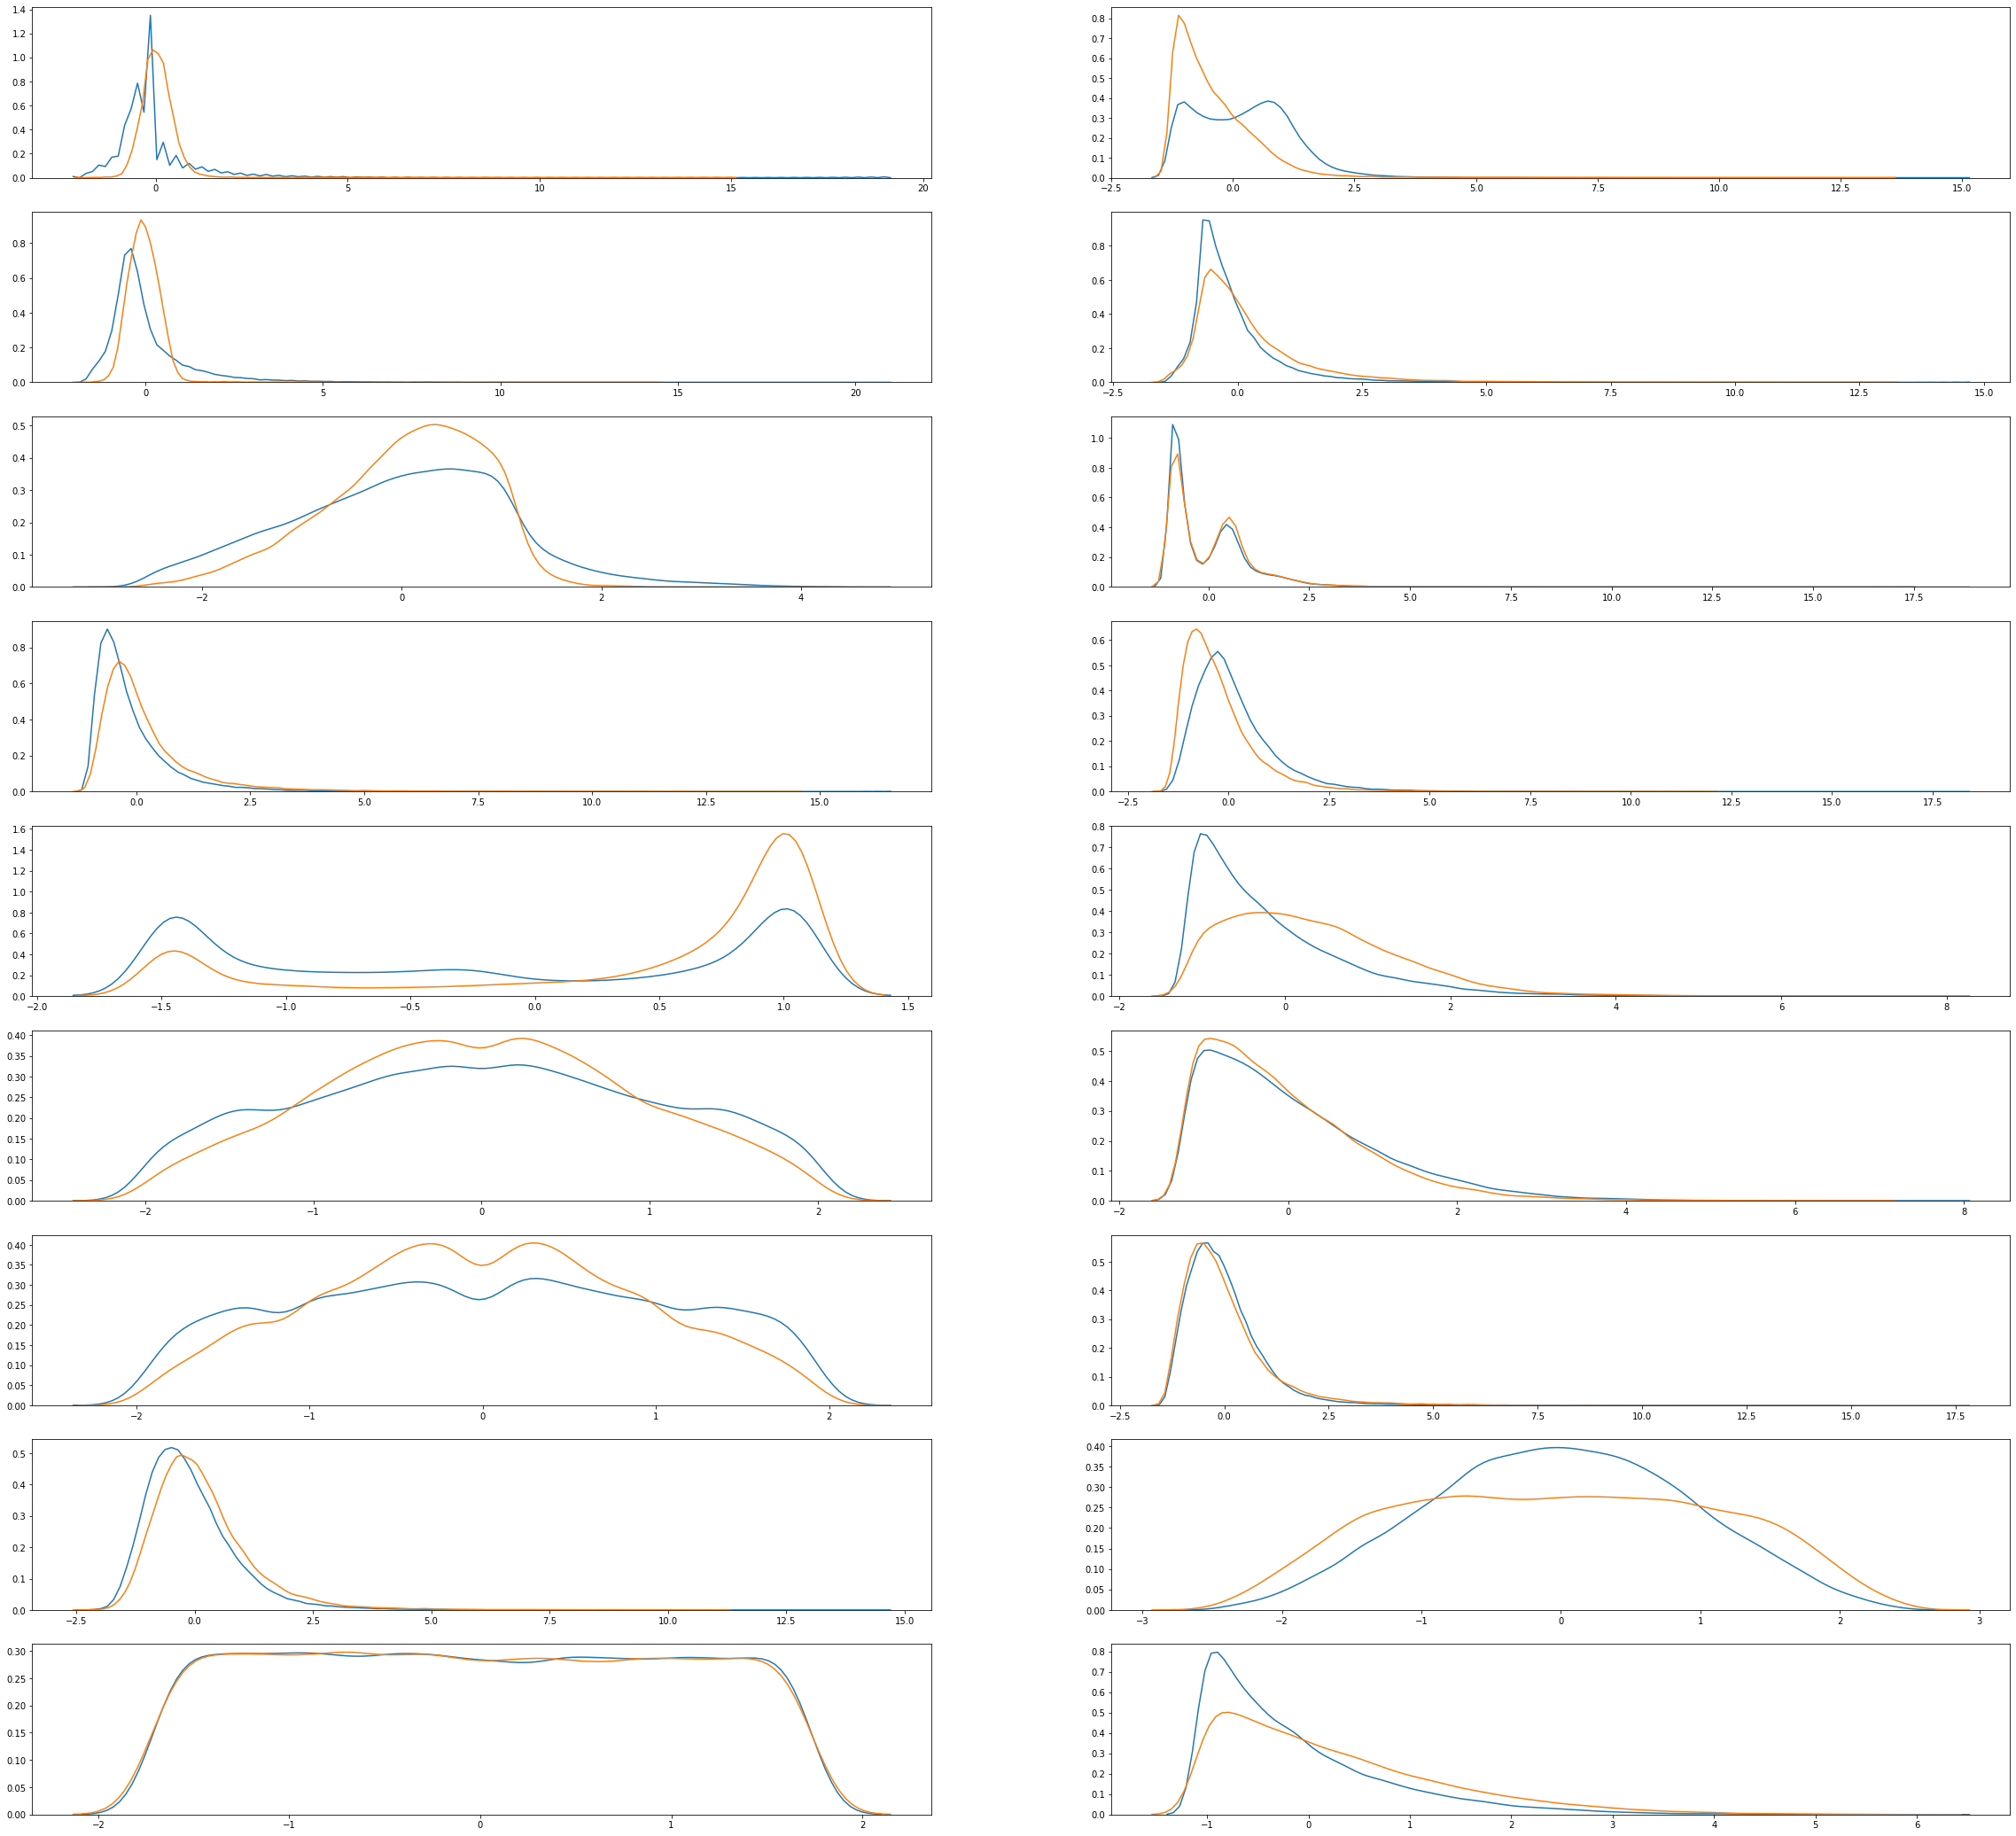

In [645]:
labels_dropped1=y[tX1_dropped_distribution[:,0].astype(int)]
tX1_label0=tX1_dropped_distribution[labels_dropped1==-1]
tX1_label1=tX1_dropped_distribution[labels_dropped1==1]
# sns.distplot( tX0_label0[:,3],ax=plt.gca(),hist=False)
fig1=plt.figure(figsize=(40,80))
for i in range(1,tX1_label0.shape[1]):
    plt.subplot(19,2,i)
    sns.distplot(tX1_label0[:,i],ax=plt.gca(),hist=False)
    sns.distplot(tX1_label1[:,i],ax=plt.gca(),hist=False)

### Analyse tX2

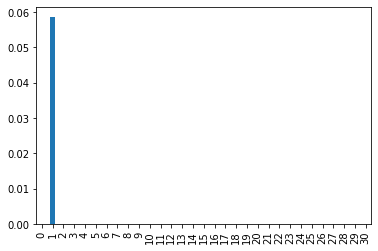

In [646]:
import pandas as pd

df=pd.DataFrame(tX2)

missing_series=df.isnull().sum()/df.shape[0]
missing_series.plot(kind="bar")

In [647]:
tX2[:,1:2]=nan_to_median(tX2[:,1:2])

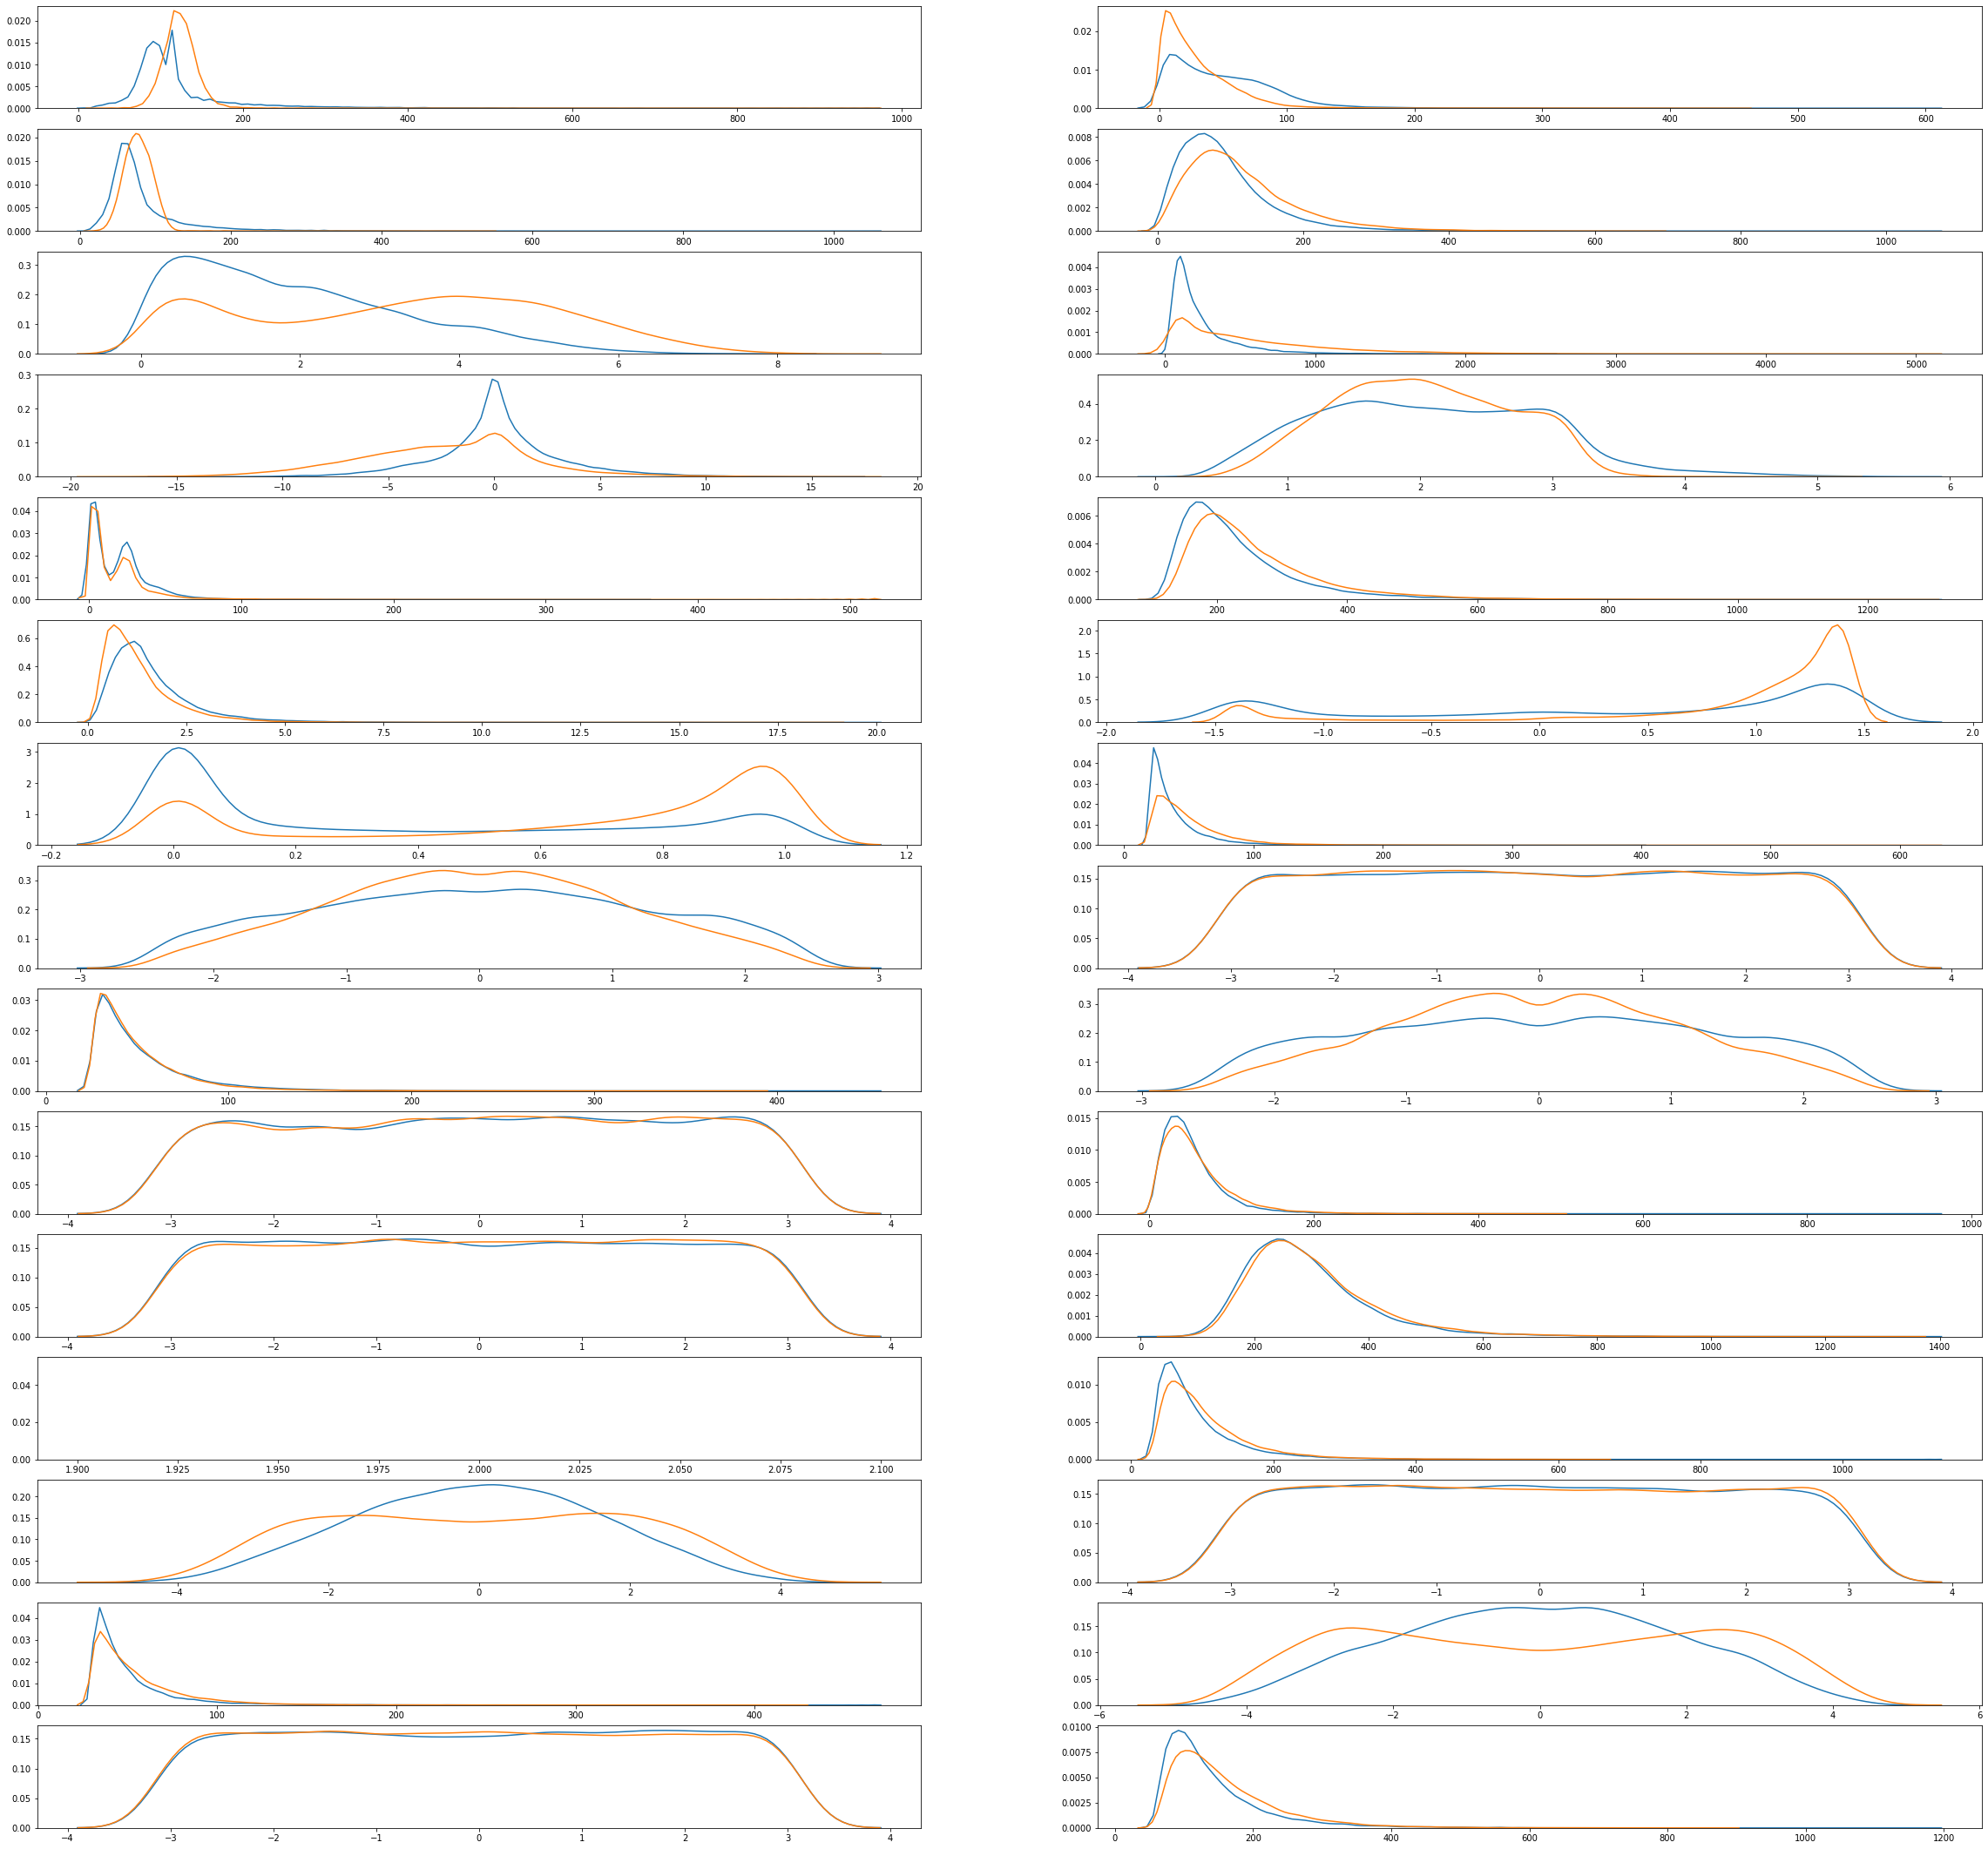

In [430]:
labels_dropped1=y[tX2[:,0].astype(int)]
tX2_label0=tX2[labels_dropped1==-1]
tX2_label1=tX2[labels_dropped1==1]
fig=plt.figure(figsize=(40,80))
for i in range(1,tX2_label0.shape[1]):
    plt.subplot(31,2,i)
    sns.distplot( tX2_label0[:,i],ax=plt.gca(),hist=False)
    sns.distplot( tX2_label1[:,i],ax=plt.gca(),hist=False)

In [648]:
tX2_dropped_distribution=np.delete(tX2,[16,19,21,23,29,30],axis=1)


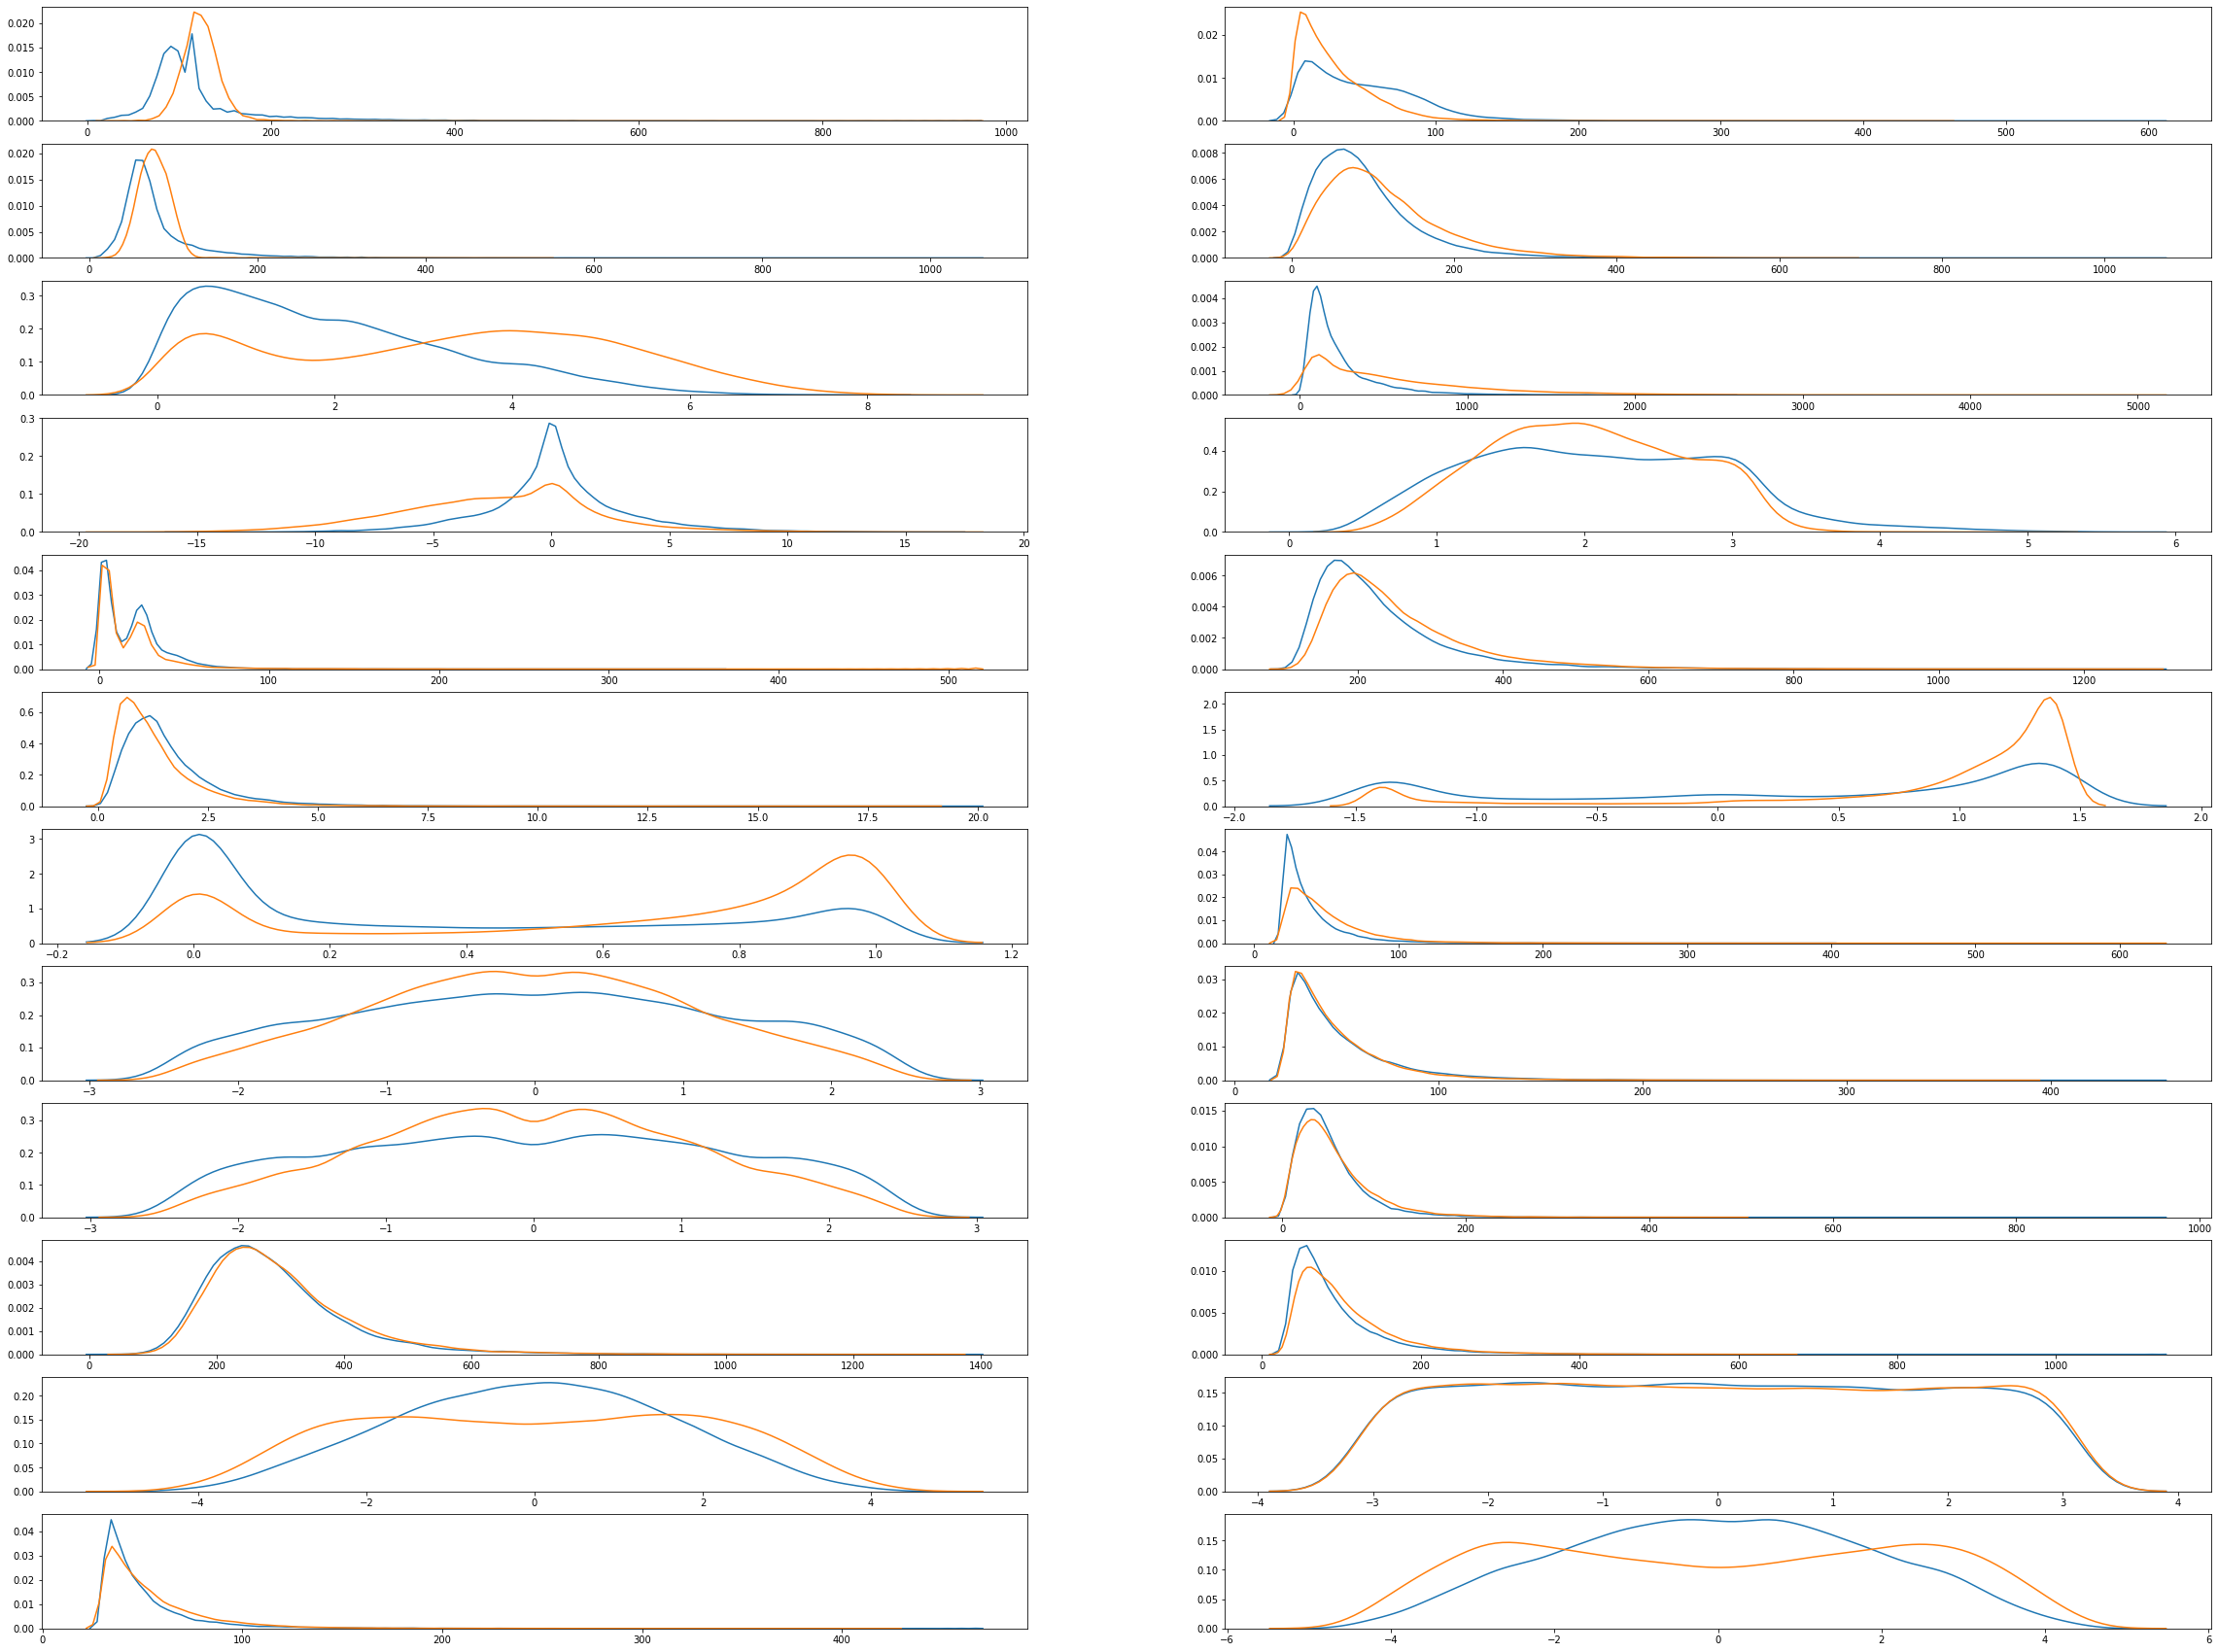

In [649]:
labels_dropped_distribution_2=y[tX2_dropped_distribution[:,0].astype(int)]
tX2_label0=tX2_dropped_distribution[labels_dropped_distribution_2==-1]
tX2_label1=tX2_dropped_distribution[labels_dropped_distribution_2==1]
fig=plt.figure(figsize=(40,80))
for i in range(1,tX2_label0.shape[1]):
    plt.subplot(31,2,i)
    sns.distplot( tX2_label0[:,i],ax=plt.gca(),hist=False)
    sns.distplot( tX2_label1[:,i],ax=plt.gca(),hist=False)

In [650]:
index_to_be_skewed=[2,4,6,11,14,16,20,23]

tX2_skew_mins=np.apply_along_axis(np.min,0,tX2_dropped_distribution)
tX2_dropped_distribution[:,index_to_be_skewed]=tX2_dropped_distribution[:,index_to_be_skewed]+np.abs(tX2_skew_mins[index_to_be_skewed])
tX2_dropped_distribution[:,index_to_be_skewed]= np.log(tX2_dropped_distribution[:,index_to_be_skewed]+1)

tX2_dropped_distribution[:,1:]=standardize(tX2_dropped_distribution[:,1:])
tX2_dropped_distribution

array([[ 0.00000000e+00,  3.00272239e-01,  6.95799631e-01, ...,
         2.52660170e-01, -1.47103101e-01,  5.87235251e-01],
       [ 6.00000000e+00,  4.90298045e-01,  1.68970246e-01, ...,
         8.08491907e-01,  3.85831738e-01,  6.77490068e-02],
       [ 2.30000000e+01,  3.55908927e-01, -2.47365815e+00, ...,
         7.89706342e-01,  1.42468319e+00, -3.67420264e-01],
       ...,
       [ 2.49980000e+05, -4.22324608e-02, -1.54606867e-01, ...,
         6.25056384e-01, -2.72507642e-01, -8.01652679e-01],
       [ 2.49985000e+05,  7.26440886e-02,  1.73964748e-01, ...,
         2.61283483e-02, -8.26246970e-01, -2.74203165e-01],
       [ 2.49994000e+05,  1.75170427e+00,  6.12837484e-01, ...,
         1.73450979e+00, -9.38230719e-01, -2.07838158e-02]])

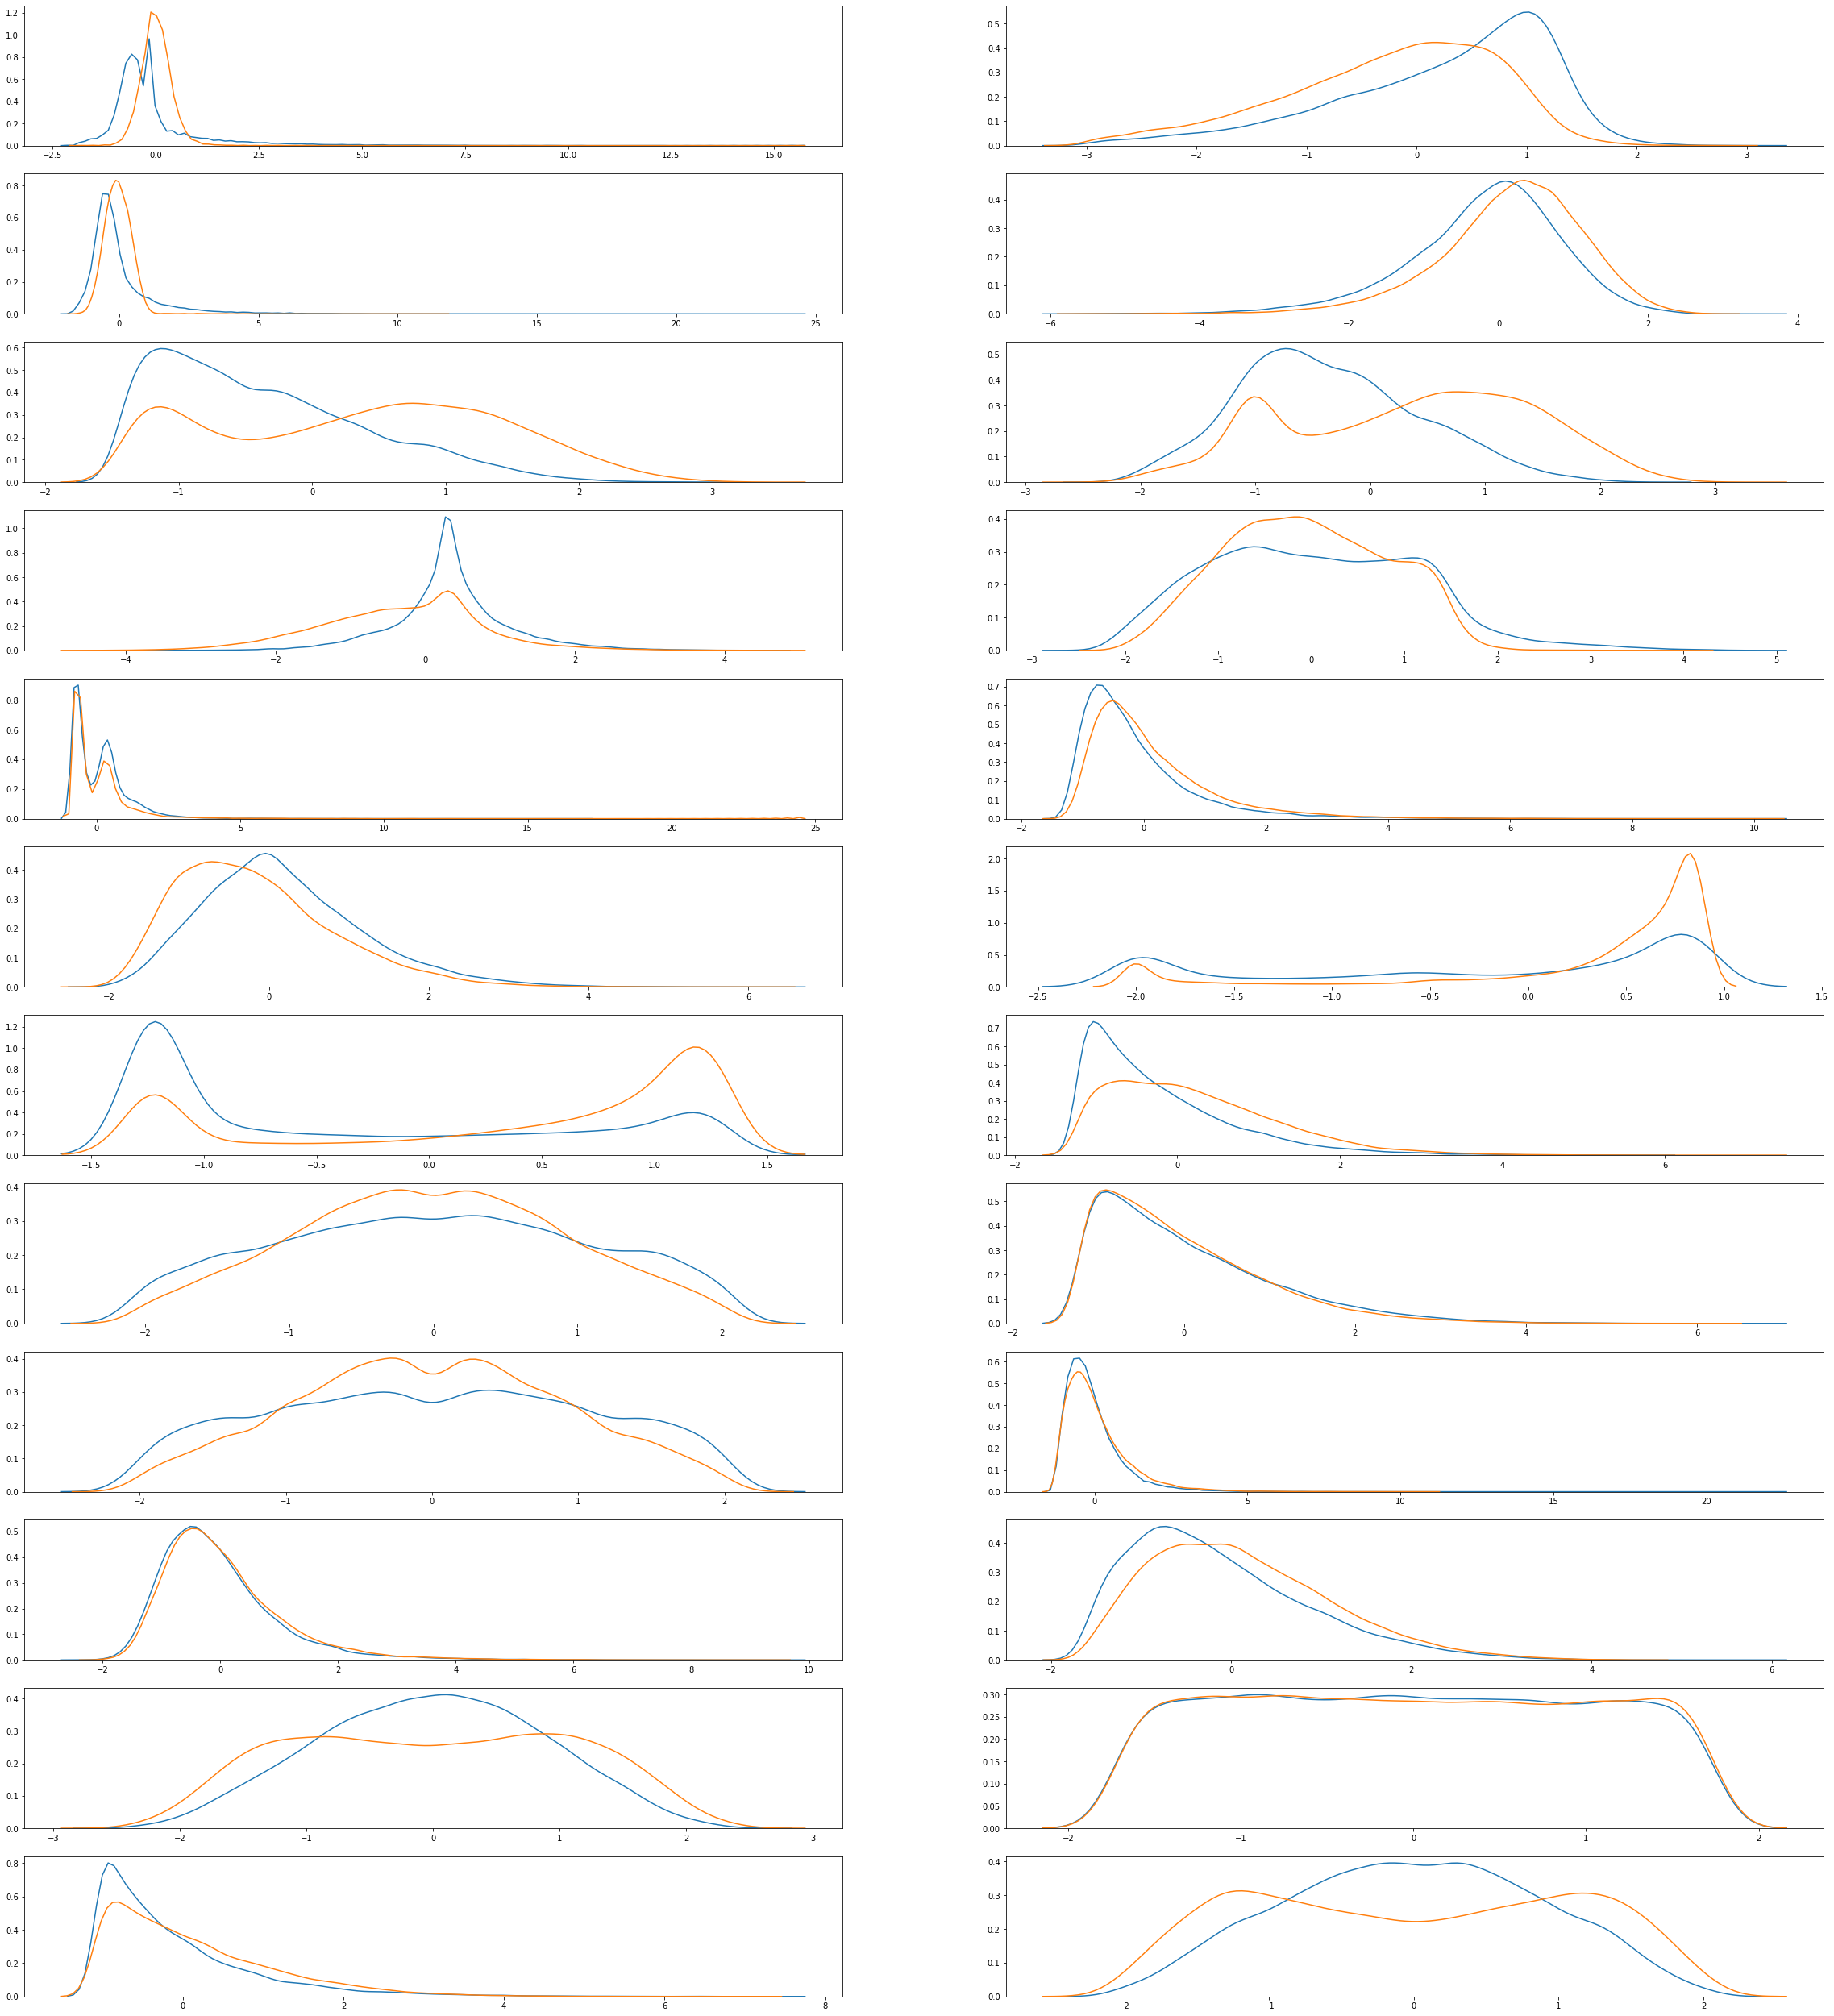

In [651]:
labels_dropped1=y[tX2_dropped_distribution[:,0].astype(int)]
tX2_label0=tX2_dropped_distribution[labels_dropped1==-1]
tX2_label1=tX2_dropped_distribution[labels_dropped1==1]
# sns.distplot( tX0_label0[:,3],ax=plt.gca(),hist=False)
fig1=plt.figure(figsize=(40,80))
for i in range(1
               ,tX2_label0.shape[1]):
    plt.subplot(21,2,i)
    sns.distplot(tX2_label0[:,i],ax=plt.gca(),hist=False)
    sns.distplot(tX2_label1[:,i],ax=plt.gca(),hist=False)

### Analyse tX3

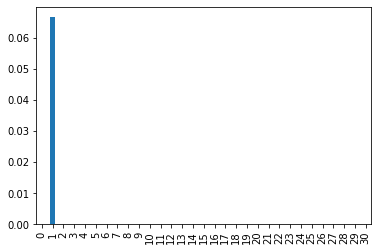

In [652]:
import pandas as pd

df=pd.DataFrame(tX3)

missing_series=df.isnull().sum()/df.shape[0]
missing_series.plot(kind="bar")

In [653]:
tX3[:,1:2]=nan_to_median(tX3[:,1:2])

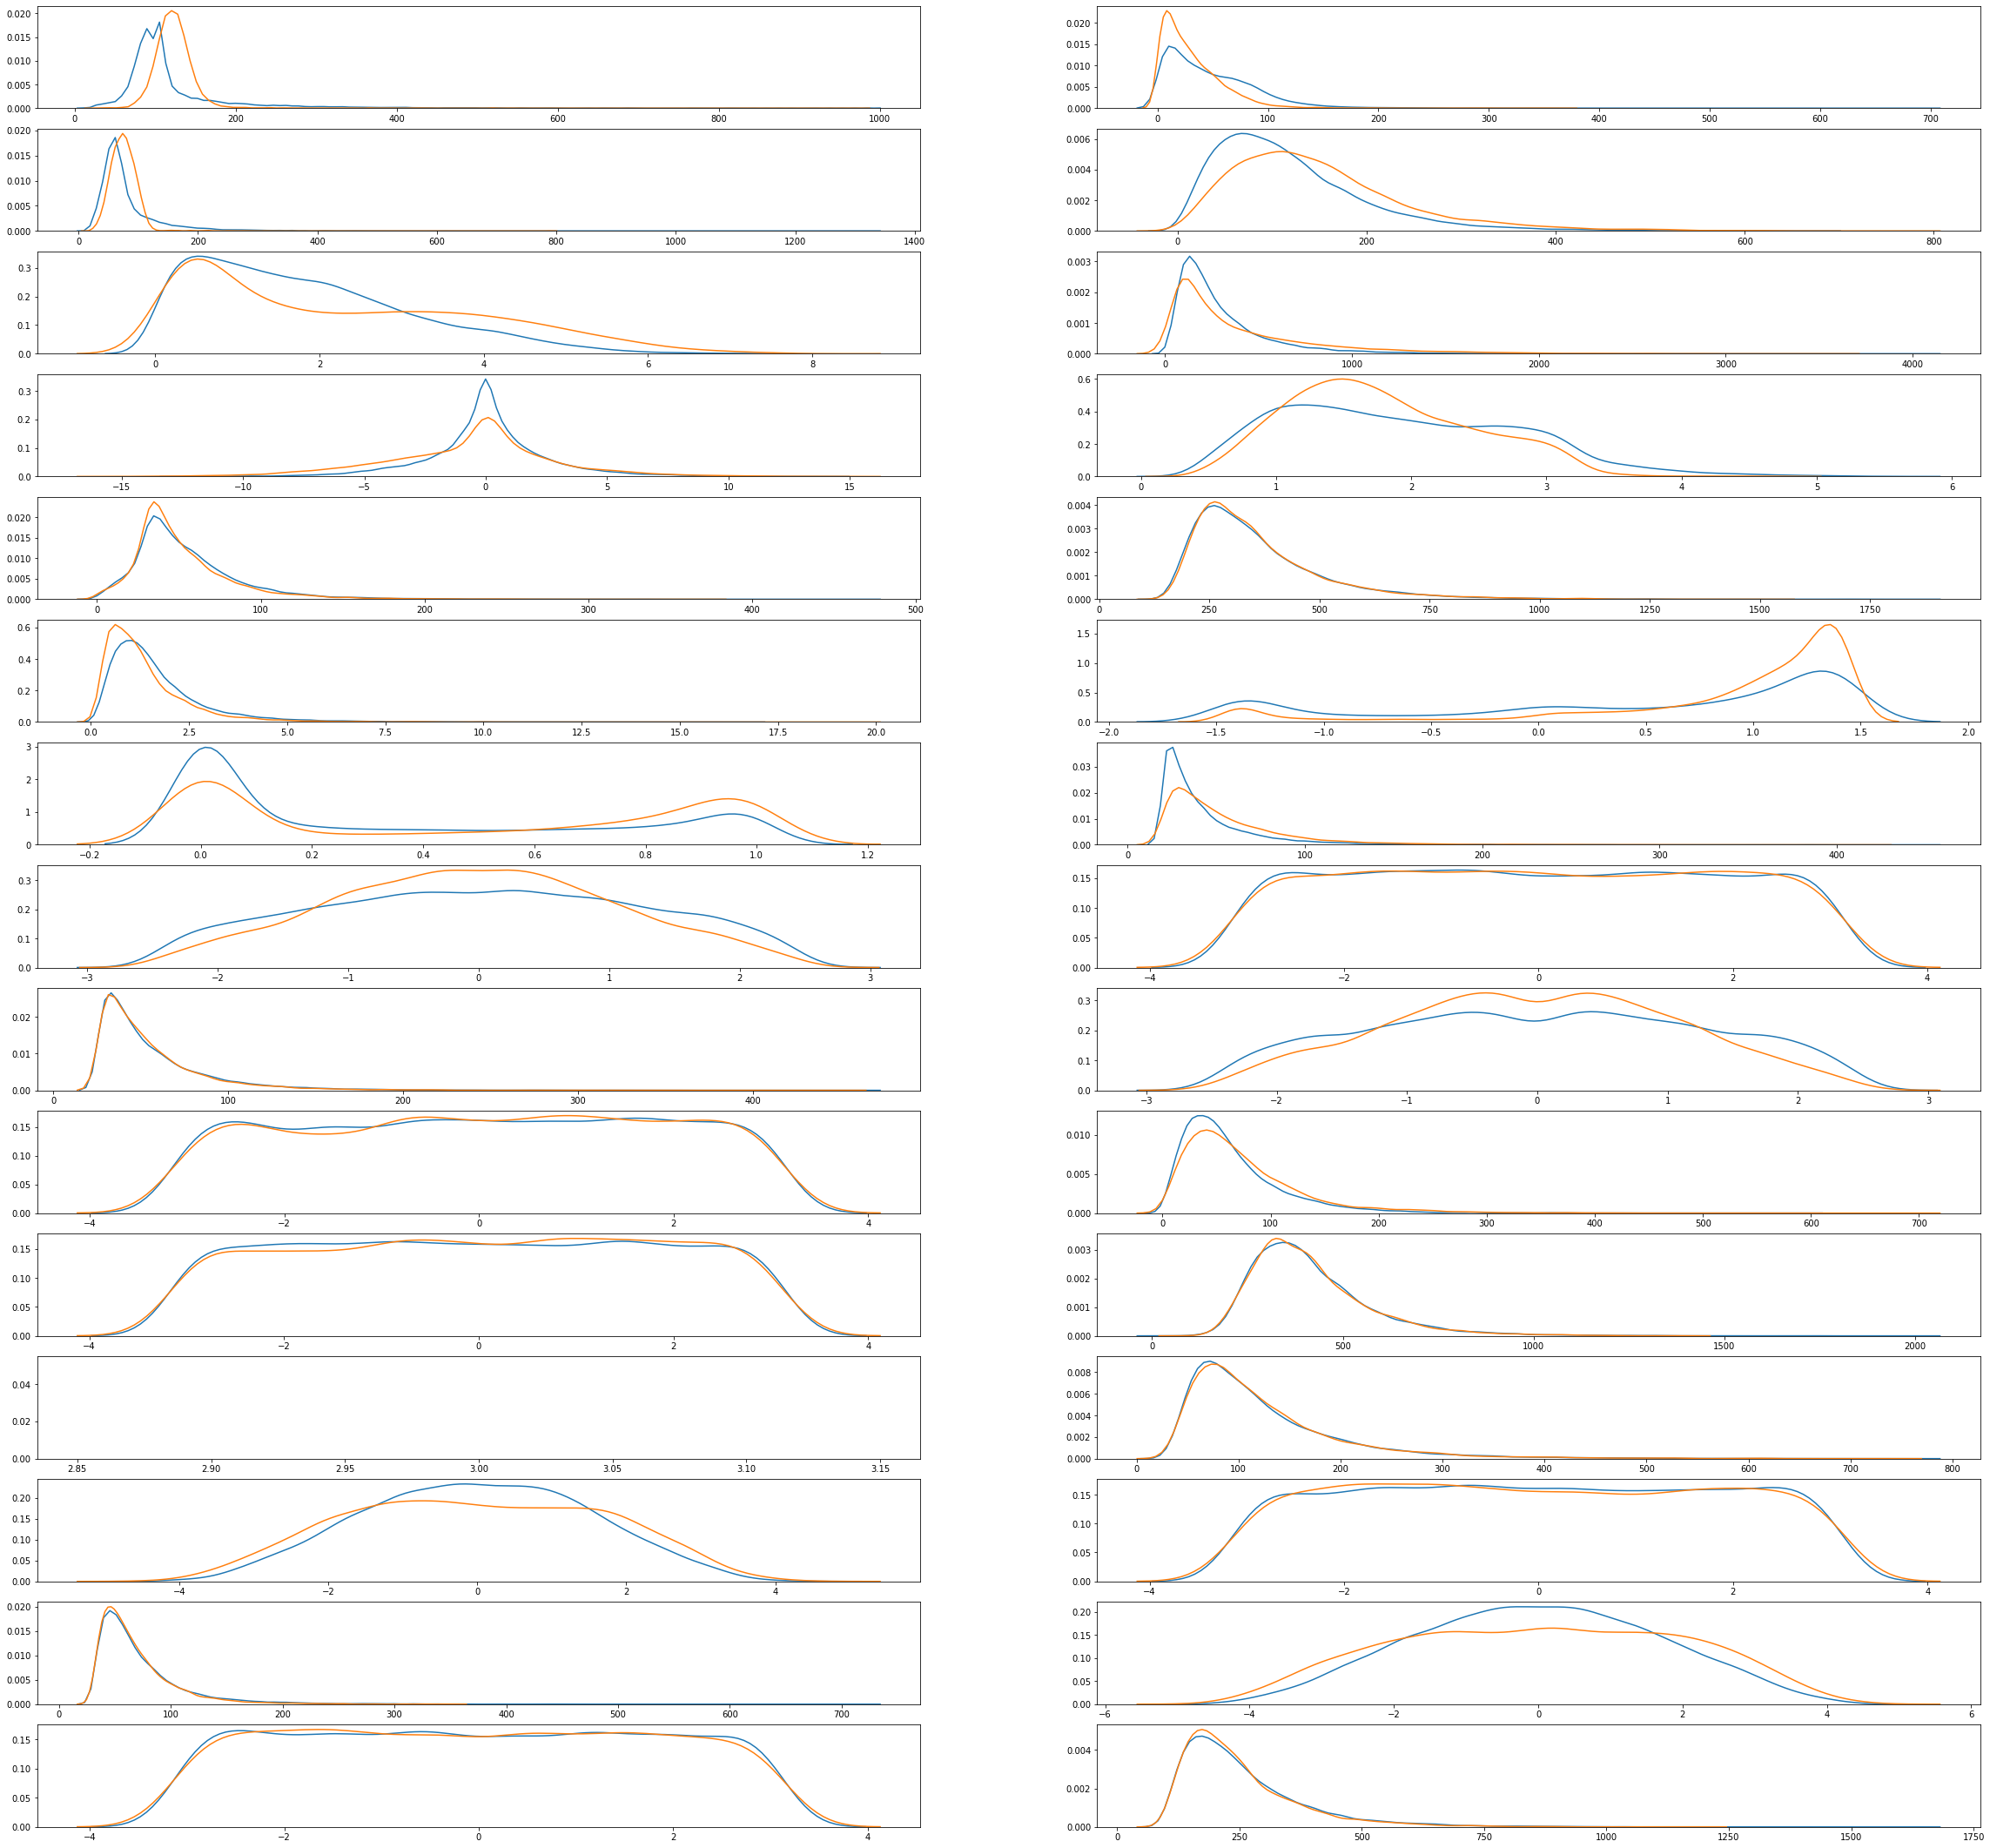

In [654]:
labels_dropped1=y[tX3[:,0].astype(int)]
tX3_label0=tX3[labels_dropped1==-1]
tX3_label1=tX3[labels_dropped1==1]
fig=plt.figure(figsize=(40,80))
for i in range(1,tX3_label0.shape[1]):
    plt.subplot(31,2,i)
    sns.distplot( tX3_label0[:,i],ax=plt.gca(),hist=False)
    sns.distplot( tX3_label1[:,i],ax=plt.gca(),hist=False)

In [655]:
tX3_dropped_distribution=np.delete(tX3,[16,19,21,23,26],axis=1)

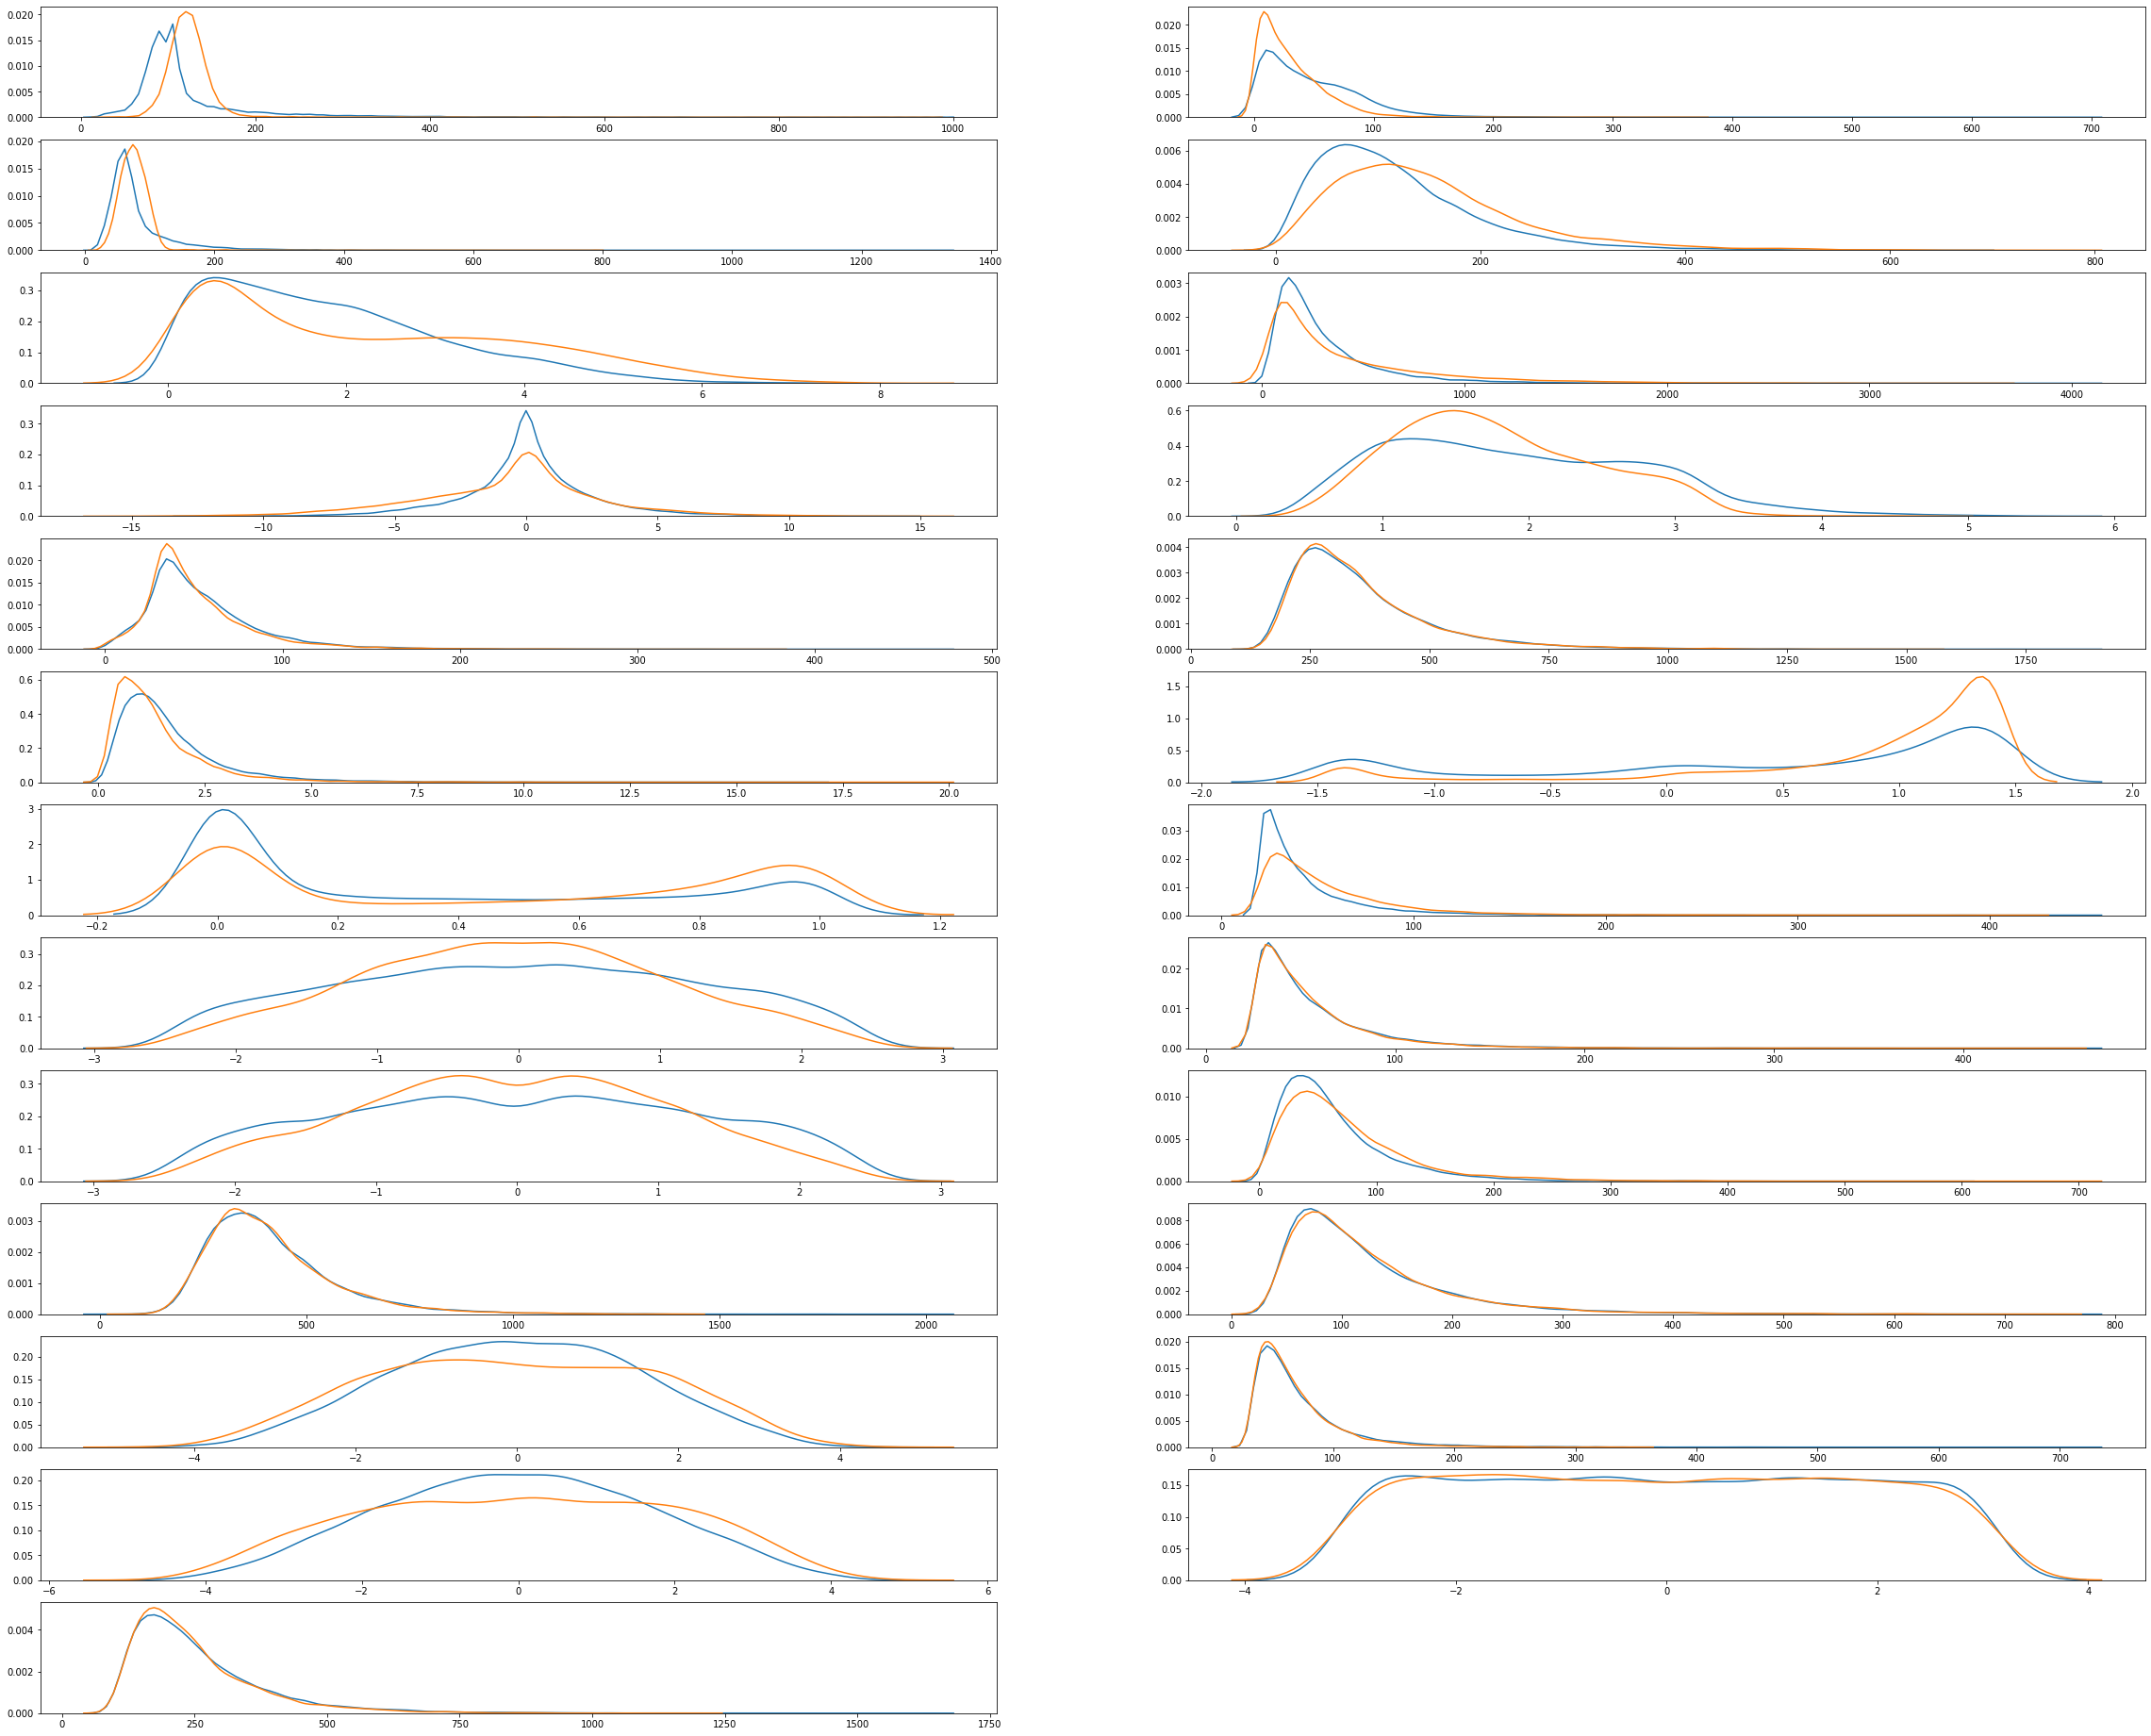

In [656]:
labels_dropped_distribution_2=y[tX3_dropped_distribution[:,0].astype(int)]
tX3_label0=tX3_dropped_distribution[labels_dropped_distribution_2==-1]
tX3_label1=tX3_dropped_distribution[labels_dropped_distribution_2==1]
fig=plt.figure(figsize=(40,80))
for i in range(1,tX3_label0.shape[1]):
    plt.subplot(31,2,i)
    sns.distplot( tX3_label0[:,i],ax=plt.gca(),hist=False)
    sns.distplot( tX3_label1[:,i],ax=plt.gca(),hist=False)

In [657]:
index_to_be_skewed=[2,6,10,14,16,22]

tX3_skew_mins=np.apply_along_axis(np.min,0,tX3_dropped_distribution)
tX3_dropped_distribution[:,index_to_be_skewed]=tX3_dropped_distribution[:,index_to_be_skewed]+np.abs(tX3_skew_mins[index_to_be_skewed])
tX3_dropped_distribution[:,index_to_be_skewed]= np.log(tX3_dropped_distribution[:,index_to_be_skewed]+1)

tX3_dropped_distribution[:,1:]=standardize(tX3_dropped_distribution[:,1:])
tX3_dropped_distribution

array([[ 5.00000000e+00, -4.72301483e-01, -6.06943853e-01, ...,
         1.30561145e-01,  1.72208870e+00, -4.80029708e-01],
       [ 1.10000000e+01, -1.07901480e-01, -8.46168339e-01, ...,
         1.00308297e+00, -1.13506895e+00, -6.98166792e-01],
       [ 3.10000000e+01, -6.78776653e-03, -1.29048625e+00, ...,
        -7.03657593e-01, -3.25035826e-01, -1.44759688e-02],
       ...,
       [ 2.49966000e+05, -2.12994441e-01,  1.05382718e+00, ...,
         1.73365806e+00,  8.98830546e-01,  1.28550959e-01],
       [ 2.49992000e+05, -2.12994441e-01,  3.23571387e-01, ...,
         2.94475833e-01,  2.39783188e-01, -4.02887654e-01],
       [ 2.49993000e+05,  1.15563179e-01, -1.62842262e+00, ...,
         3.29962518e-01, -1.21001079e+00,  2.26346841e+00]])

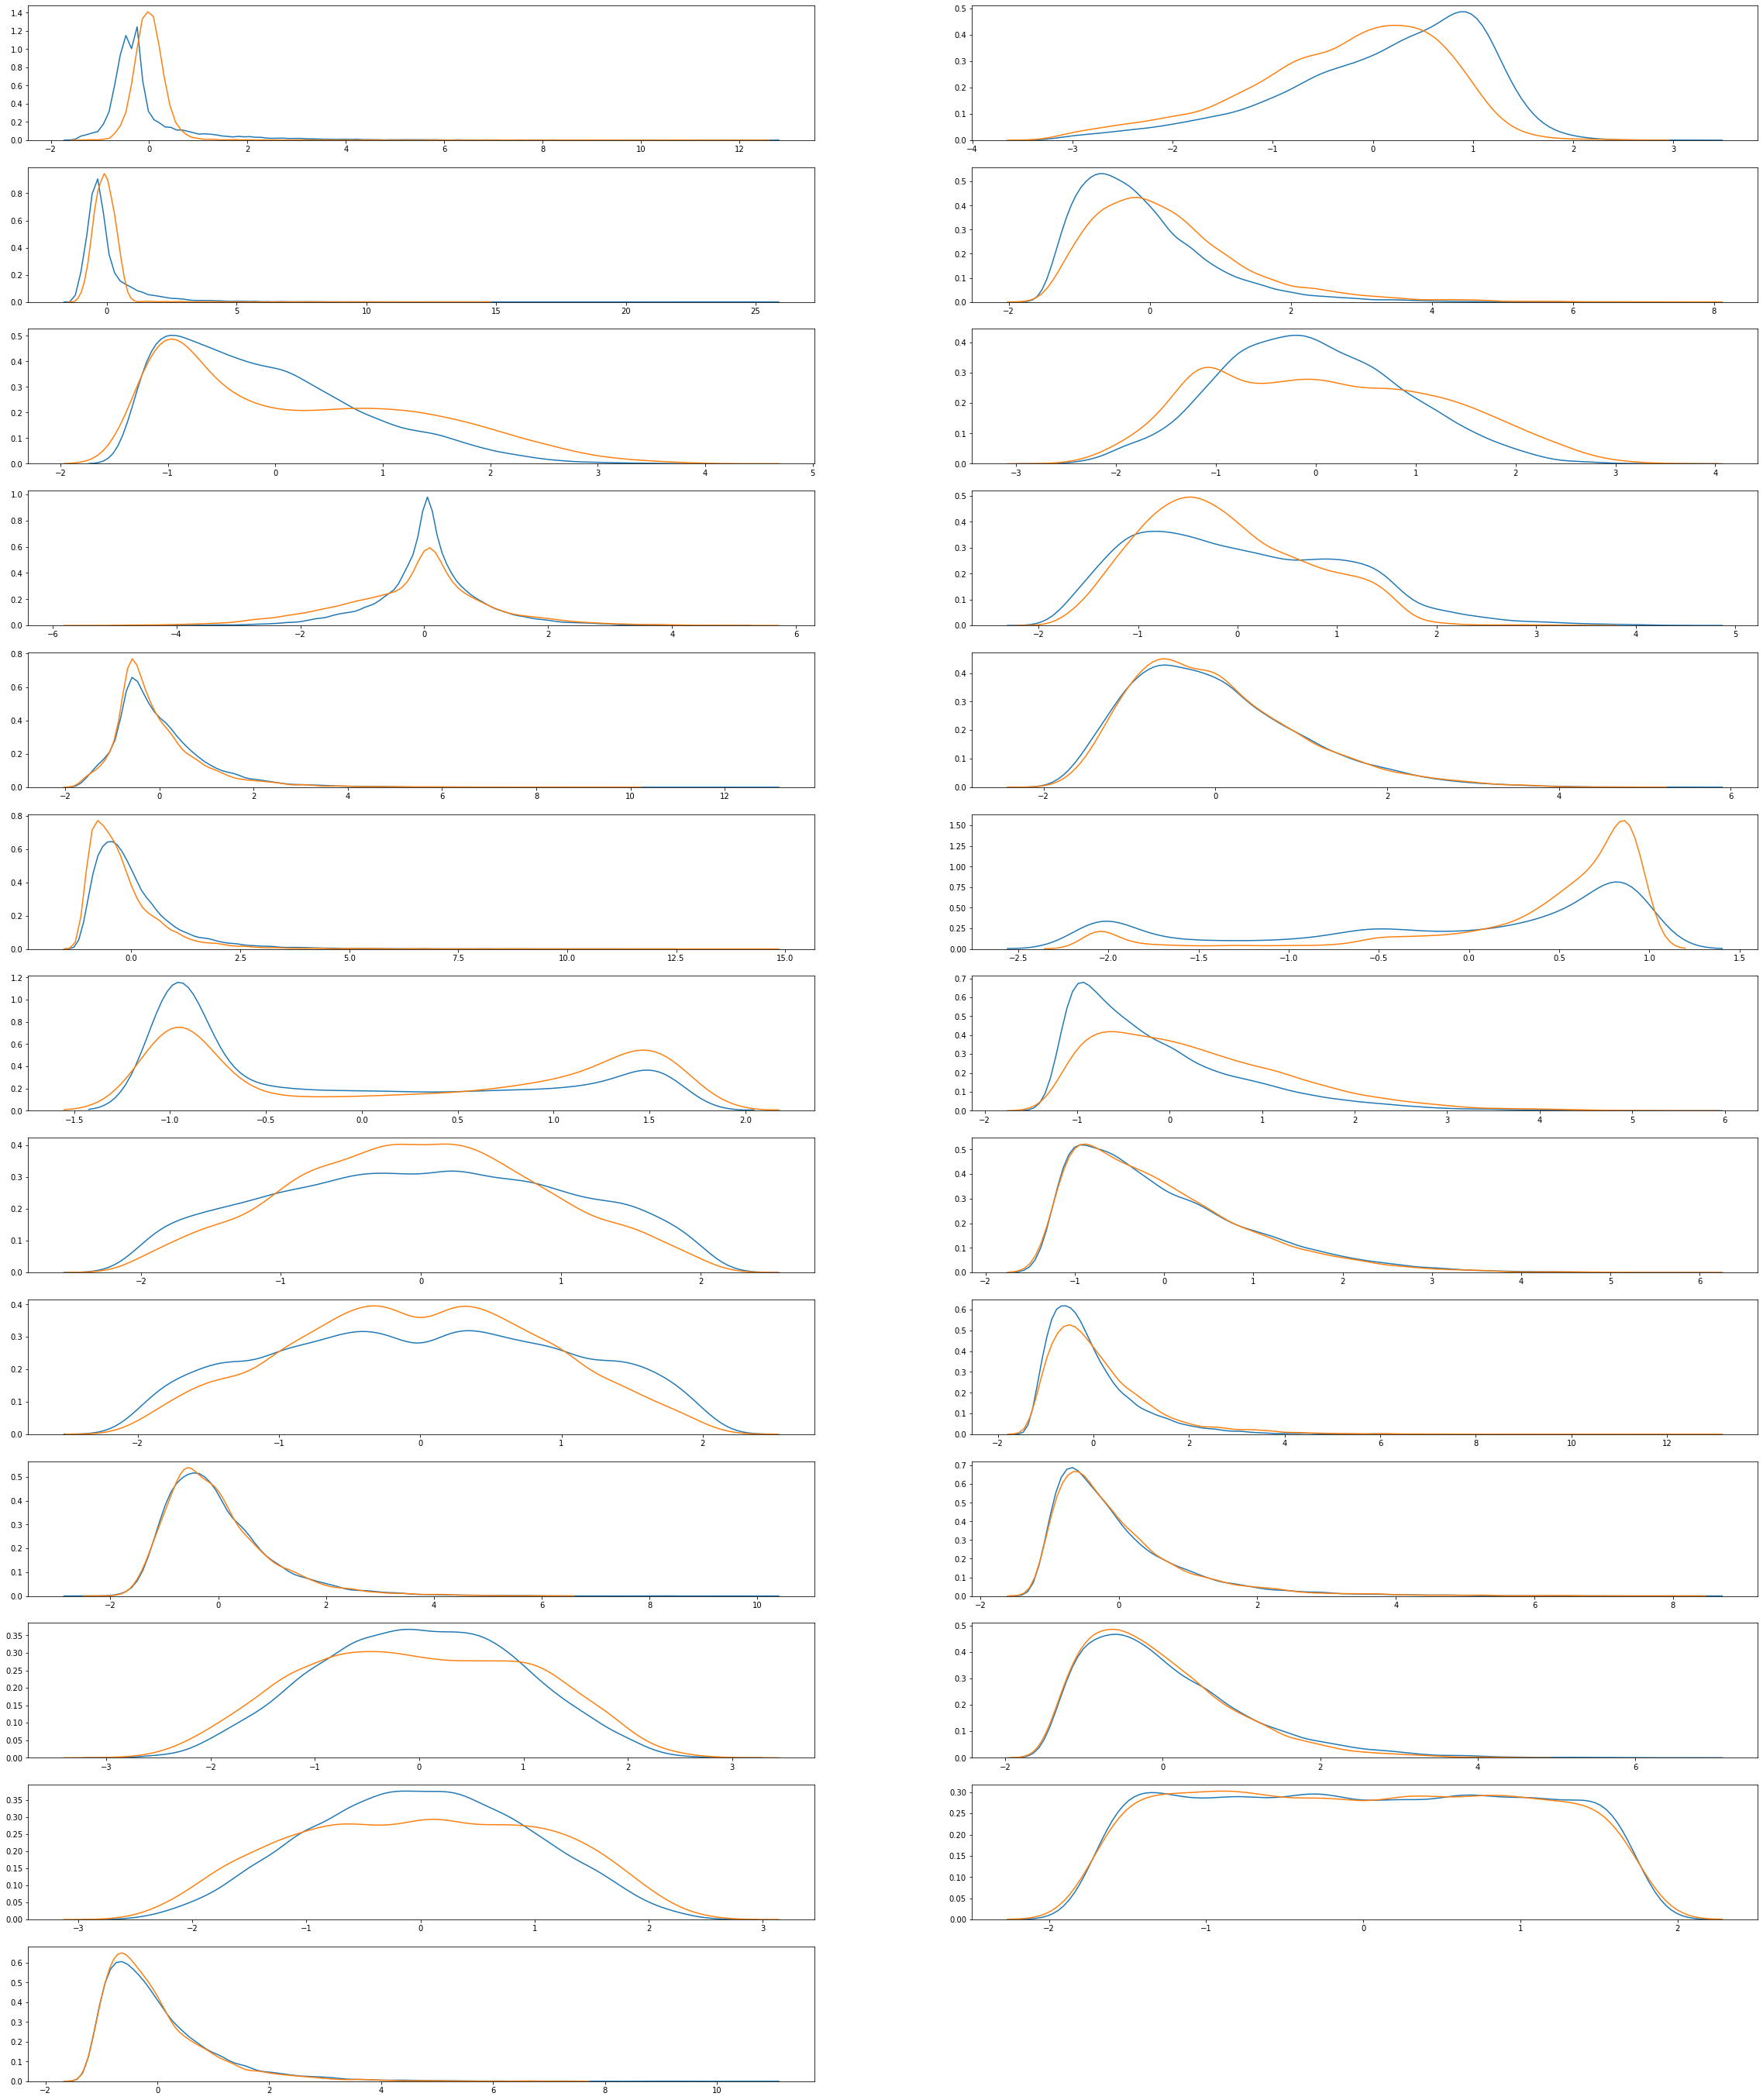

In [658]:
labels_dropped1=y[tX3_dropped_distribution[:,0].astype(int)]
tX3_label0=tX3_dropped_distribution[labels_dropped1==-1]
tX3_label1=tX3_dropped_distribution[labels_dropped1==1]
# sns.distplot( tX0_label0[:,3],ax=plt.gca(),hist=False)
fig1=plt.figure(figsize=(40,80))
for i in range(1,tX3_label0.shape[1]):
    plt.subplot(21,2,i)
    sns.distplot(tX3_label0[:,i],ax=plt.gca(),hist=False)
    sns.distplot(tX3_label1[:,i],ax=plt.gca(),hist=False)

## Do your thing crazy machine learning thing here :) ...

In [133]:
# from gradient_descent import *
from plots import gradient_descent_visualization
import datetime

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.05

# Initialization
w_initial = np.zeros(tX.shape[1])

# Start gradient descent.
start_time = datetime.datetime.now()
weights, loss = m.gradient_descent(y, tX, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))
print("Loss",loss)

Gradient Descent: execution time=0.625 seconds
Loss 9.42573173391468e+82


### cross validation

In [503]:
def build_k_indices(y, k_fold, seed):
    """build k indices for k-fold."""
    num_row = y.shape[0]
    interval = int(num_row / k_fold)
    np.random.seed(seed)
    indices = np.random.permutation(num_row)
    k_indices = [indices[k * interval: (k + 1) * interval]
                 for k in range(k_fold)]
    return np.array(k_indices)

In [507]:
from build_polynomial import build_poly_matrix

def cross_validation(y, x, k_indices, k, degree,gamma):
    """return the loss of ridge regression."""
    # get k'th subgroup in test, others in train
    te_indice = k_indices[k]
    tr_indice = k_indices[~(np.arange(k_indices.shape[0]) == k)]
    tr_indice = tr_indice.reshape(-1)
    y_te = y[te_indice]
    y_tr = y[tr_indice]
    x_te = x[te_indice]
    x_tr = x[tr_indice]
#     print(y_te.shape, x_te.shape)
    # form data with polynomial degree
    tx_tr = build_poly_matrix(x_tr, degree)
    tx_te = build_poly_matrix(x_te, degree)
    # ridge regression
    w,loss = m.gradient_descent(y_tr, tx_tr,np.zeros(tx_tr.shape[1]), 50,gamma)
    # calculate the loss for train and test data
    
    loss_tr = np.sqrt(2 * m.mse(y_tr, tx_tr, w))
    loss_te = np.sqrt(2 * m.mse(y_te, tx_te, w))
    return loss_tr, loss_te,w

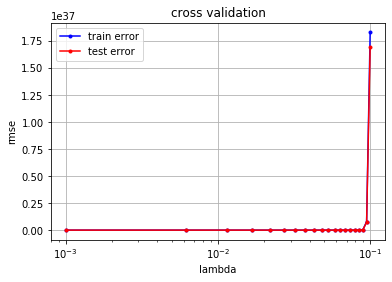

In [510]:
def cross_validation_demo():
    seed = 12
    k_fold = 4
    degree = 2
    gammas= np.linspace(0.001, 0.1, 20)
    # split data in k fold
    k_indices = build_k_indices(y[tX1_dropped_distribution[:,0].astype(int)], k_fold, seed)
    # define lists to store the loss of training data and test data
    rmse_tr = []
    rmse_te = []
    # cross validation
    for gamma in gammas:
        rmse_tr_tmp = []
        rmse_te_tmp = []
        for k in range(k_fold):
            loss_tr, loss_te,_ = cross_validation(y[tX1_dropped_distribution[:,0].astype(int)], tX1_dropped_distribution[:,1:], k_indices, k, degree, gamma)
            rmse_tr_tmp.append(loss_tr)
            rmse_te_tmp.append(loss_te)
        rmse_tr.append(np.mean(rmse_tr_tmp))
        rmse_te.append(np.mean(rmse_te_tmp))

    cross_validation_visualization(gammas, rmse_tr, rmse_te)

cross_validation_demo()

## ridge regression

In [659]:
def cross_validation_visualization(lambds, mse_tr, mse_te):
    """visualization the curves of mse_tr and mse_te."""
    plt.semilogx(lambds, mse_tr, marker=".", color='b', label='train error')
    plt.semilogx(lambds, mse_te, marker=".", color='r', label='test error')
    plt.xlabel("lambda")
    plt.ylabel("rmse")
    plt.title("cross validation")
    plt.legend(loc=2)
    plt.grid(True)
    plt.savefig("cross_validation")

In [660]:
degree=4

In [661]:
from build_polynomial import build_poly_matrix

def cross_validation_ridge(y, x, k_indices, k, lambda_, degree):
    """return the loss of ridge regression."""
    # get k'th subgroup in test, others in train
    te_indice = k_indices[k]
    tr_indice = k_indices[~(np.arange(k_indices.shape[0]) == k)]
    tr_indice = tr_indice.reshape(-1)
    y_te = y[te_indice]
    y_tr = y[tr_indice]
    x_te = x[te_indice]
    x_tr = x[tr_indice]
#     print(y_te.shape, x_te.shape)
    # form data with polynomial degree
    tx_tr = build_poly_matrix(x_tr, degree)
    tx_te = build_poly_matrix(x_te, degree)
    # ridge regression
    w,_ = m.ridge_regression(y_tr, tx_tr, lambda_)
    # calculate the loss for train and test data
    loss_tr = np.sqrt(2 * m.mse(y_tr, tx_tr, w))
    loss_te = np.sqrt(2 * m.mse(y_te, tx_te, w))
    
#     print("loss_tr: ",loss_tr)
#     print("loss_te: ",loss_te)
    
#     print(tx_tr@w)
#     res_tr=y_tr@np.sign(tx_tr@w)
#     print(res_tr/len(y_tr))
#     res_te=y_te@np.sign(tx_te@w)
#     print(res_te/len(y_te))
    return loss_tr, loss_te,w

In [617]:
def cross_validation_demo_ridge(t):
    seed = 12
    k_fold = 5
    lambdas = np.logspace(-4, -2, 20)
    # split data in k fold
    k_indices = build_k_indices(y[t[:,0].astype(int)], k_fold, seed)
    
    # define lists to store the loss of training data and test data
    rmse_tr = []
    rmse_te = []
    weights_list=[]
    # cross validation
    for lambda_ in lambdas:
        rmse_tr_tmp = []
        rmse_te_tmp = []
        for k in range(k_fold):
            loss_tr, loss_te,w = cross_validation_ridge(y[t[:,0].astype(int)], t[:,1:], k_indices, k, lambda_,degree)
            rmse_tr_tmp.append(loss_tr)
            rmse_te_tmp.append(loss_te)
        rmse_tr.append(np.mean(rmse_tr_tmp))
        rmse_te.append(np.mean(rmse_te_tmp))
        weights_list.append(w)
        
    min_index=np.argmin(rmse_te)
    weights=weights_list[min_index]
          
    cross_validation_visualization(lambdas, rmse_tr, rmse_te)
    
    return weights

In [ ]:
weights0=cross_validation_demo_ridge(tX0_dropped_distribution)
weights1=cross_validation_demo_ridge(tX1_dropped_distribution)
weights2=cross_validation_demo_ridge(tX2_dropped_distribution)
weights3=cross_validation_demo_ridge(tX3_dropped_distribution)

## Generate predictions and save ouput in csv format for submission:

In [ ]:
DATA_TEST_PATH = '/Users/gerald/Workspaces/Machine Leaning/ML-Project-1-EPFL/test.csv' # TODO: download train data and supply path here 
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)
OUTPUT_PATH = '/Users/gerald/Workspaces/Machine Leaning/ML-Project-1-EPFL/result.csv' # TODO: fill in desired name of output file for submission


In [ ]:
x0=[]
x1=[]
x2=[]
x3=[]
y0indices=[]
y1indices=[]
y2indices=[]
y3indices=[]
for index, jet_num in enumerate(tX_test[:,22]):
    
    if(int(jet_num)==0):
        x0.append(tX_test[index])
        y0indices.append(index)
    if(int(jet_num)==1):
        x1.append(tX_test[index])
        y1indices.append(index)
    if(int(jet_num)==2):
        x2.append(tX_test[index])
        y2indices.append(index)
    if(int(jet_num)==3):
        x3.append(tX_test[index])
        y3indices.append(index)
        
x0=np.array(x0)
x1=np.array(x1)
x2=np.array(x2)
x3=np.array(x3)
x0=np.delete(x0,[5,6,7,13,24,25,26,27,28,29]-np.ones(10),axis=1)
x0=np.delete(x0,[4,12,19,20]-np.ones(4),axis=1)
x1=np.delete(x1,[5,6,7,13,27,28,29]-np.ones(7),axis=1)
x1=np.delete(x1,[12,15,17,19,20]-np.ones(5),axis=1)
x2=np.delete(x2,[16,19,21,23,29,30]-np.ones(6),axis=1)
x3=np.delete(x3,[16,19,21,23,26]-np.ones(5),axis=1)

y0Predict=predict_labels(weights0,build_poly_matrix(x0, degree))
y1Predict=predict_labels(weights1,build_poly_matrix(x1, degree))
y2Predict=predict_labels(weights2,build_poly_matrix(x2, degree))
y3Predict=predict_labels(weights3,build_poly_matrix(x3, degree))



In [ ]:
y_pred=np.empty(tX_test.shape[0])
y_pred[y0indices]=y0Predict
y_pred[y1indices]=y1Predict
y_pred[y2indices]=y2Predict
y_pred[y3indices]=y3Predict
# y_pred = predict_labels(weights, build_poly(tX_test,degree))
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)